In [183]:
_clusters = [
  ['GFF', 'KELYA', 'KFRC'],
  ['BLFS', 'IMMR', 'LCTX', 'VRAYQ'],
  ['CALA', 'CRIS', 'MGNX', 'MRTX'],
  ['ASAP', 'KTCC', 'LIVE', 'NC', 'NHIQ'],
  ['LRCX', 'MKSI', 'TXN', 'WDC'],
  ['AGM', 'FRBK', 'WHG'],
  ['BAH', 'MSI', 'PLNT'],
  ['CMCSA', 'IPG', 'PARA'],
  ['ALGT', 'CCL', 'DAL', 'SAVE', 'UAL'],
  ['ATHM', 'CAF', 'MLCO', 'MOMO', 'WB'],
  ['FTV', 'GGG', 'MMM', 'ROP'],
  ['EZU', 'GF', 'IEFA', 'IEUR', 'IVLU', 'MOTI', 'SCHC', 'VEA', 'VSS', 'VYMI'],
  ['ICVT', 'IXN', 'IYW', 'MGK', 'ONEQ'],
  ['CSM', 'IYY', 'MGC', 'PUTW', 'SCHX'],
  ['CEV', 'CXH', 'DTF', 'IQI', 'KSM', 'MFM', 'MHD', 'MHF', 'MHI', 'MHN', 'MIY', 'MNP', 'MPA', 'MQY', 'MVT', 'MYN', 'NAN', 'NAZ', 'NBH', 'NCA', 'NUW'],
  ['AIA', 'EEMO', 'EMF', 'FNDE', 'IDX', 'VWO'],
  ['BHLB', 'CTBI', 'HOMB', 'SYBT'],
  ['CFG', 'MTB', 'WFC'],
  ['ACN', 'PAYX', 'SPGI'],
  ['APA', 'CHK', 'HAL', 'MTDR', 'RRC'],
  ['BP', 'ERX', 'FILL', 'IGE'],
  ['BCS', 'BSIG', 'DB', 'IVZ', 'MFC'],
  ['AKO.B', 'BCH', 'BRZU', 'CEW', 'CX', 'EWW', 'FBZ', 'MXF', 'PAC', 'TX', 'VLRS'],
  ['CORN', 'DBA', 'SUPV', 'WEAT'],
  ['AGG', 'AGGY', 'BIV', 'CMBS', 'VCIT'],
  ['ANGL', 'BSJN', 'BSJO'],
  ['CL', 'MKC', 'PG'],
  ['EXR', 'FRT', 'GNL', 'IYR', 'MPW', 'NHI', 'NSA', 'OLP', 'RWO', 'RWR'],
  ['DEO', 'FTS', 'SBAC'],
  ['D', 'NI', 'PEG', 'SO'],
  ['ALE', 'IDA', 'MGEE', 'SWX'],
  ['ARR', 'MFA', 'MORT', 'PMT', 'RWT'],
  ['CEF', 'GDX', 'MUX', 'PPLT', 'SA'],
  ['DOG', 'FAZ', 'RWM', 'TWM']
]

In [184]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from datapipeline import DataPipeline
from portfoliopipeline import PortfolioPipeline
from clusterpipeline import ClusterPipeline
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import adfuller
from scipy.linalg import sqrtm
from scipy.stats import pearsonr
import seaborn as sns


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [185]:

# stocks = ['CALA', 'MGNX', 'MRTX']
# stocks = ['ICVT', 'IXN', 'IYW', 'MGK', 'ONEQ']
# stocks = ['CEV', 'CXH', 'DTF', 'IQI', 'KSM', 'MFM', 'MHD', 'MHF', 'MHI', 'MHN', 'MIY', 'MNP', 'MPA', 'MQY', 'MVT', 'MYN', 'NAN', 'NAZ', 'NBH', 'NCA', 'NUW']
# stocks = ['EZU', 'GF', 'IEUR', 'IVLU', 'MOTI', 'SCHC', 'VEA', 'VYMI']
# stocks = [item for sublist in _clusters for item in sublist]
datapipeline = DataPipeline([], (2016,1,1), (2018,1,1), (2020,1,1), (2020,1,1), 'D')
datapipeline.debug = True
train_df, valid_df, test_df, train_valid_df = datapipeline.preprocess_and_split_data()
train_df.head()

'Wanted 0 tickers but got 1193 tickers'

'##### Filtering #####'

"Failed volume columns Index(['AAA', 'AAME', 'AAPB', 'ACAHU', 'ACAX', 'ACVA', 'ADIV', 'ADV', 'ADXS',\n       'AEL.PRB',\n       ...\n       'WLMSQ', 'WNNR.U', 'WRB.PRE', 'XBIO', 'XC', 'XDAT', 'XRTX', 'XTWY',\n       'YOTAR', 'YS'],\n      dtype='object', length=617)"

"Failed price columns Index(['AAA', 'AACG', 'AAME', 'AAPB', 'AATC', 'AAU', 'ACAHU', 'ACAX', 'ACTG',\n       'ACVA',\n       ...\n       'WINV', 'WLMSQ', 'WNNR.U', 'WRB.PRE', 'XC', 'XDAT', 'XRTX', 'XTWY',\n       'YOTAR', 'YS'],\n      dtype='object', length=568)"

'##### Coordinating #####'

(503, 520)

'Df new start date 2017-08-02, removed first 398 or 79.13% rows'

'0 original tickers to 499 tickers'

'105 + 503 + 0'

AAN   AAPL  ABBNY    ABEO    ACN    ADM    AGG   AGGY    AGM  \
2017-08-02  164.16  36.81  19.55  191.25  58.47  35.35  93.44  41.72  54.36   
2017-08-03  163.87  36.44  19.45  182.50  59.11  35.46  93.62  41.81  53.79   
2017-08-04  165.76  36.64  19.37  201.25  59.19  35.43  93.47  41.70  53.94   
2017-08-07  164.33  37.20  19.35  206.25  58.95  35.31  93.47  41.70  53.21   
2017-08-08  163.55  37.50  19.31  192.50  58.70  35.14  93.38  41.62  53.50   

              AIA  ...     WHR    WWW    XHS    XTNT  YELLQ    YPF   YTRA  \
2017-08-02  53.69  ...  138.32  24.48  57.83   8.520  12.45  20.36  10.64   
2017-08-03  53.44  ...  137.79  24.27  57.65   9.120  12.38  19.80  10.39   
2017-08-04  53.46  ...  139.29  24.32  57.45   9.474  12.78  19.39  10.30   
2017-08-07  53.78  ...  139.73  24.43  57.63  10.680  12.66  19.14  10.66   
2017-08-08  54.03  ...  139.85  24.35  57.72  10.560  12.55  18.59  10.79   

            YVRLF    ZBRA    ZYME  
2017-08-02   5.16   97.75  7.0400  
2017-08-03   5.16   95.97  7.1201  
2017-08-04   5.16   96.20  6.8100  
2017-08-07   5.52   97.25  6.4800  
2017-08-08   5.04  106.65  6.7100  

[5 rows x 499 columns]

'499 to 499 columns - 0 NA columns dropped'

'Dropped [] columns'

'499 to 498 columns - 1 NA columns dropped'

"Dropped ['MGR'] columns"

'41.421340098318744% of variance - 15 components'

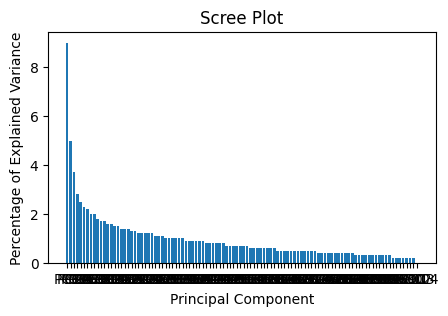

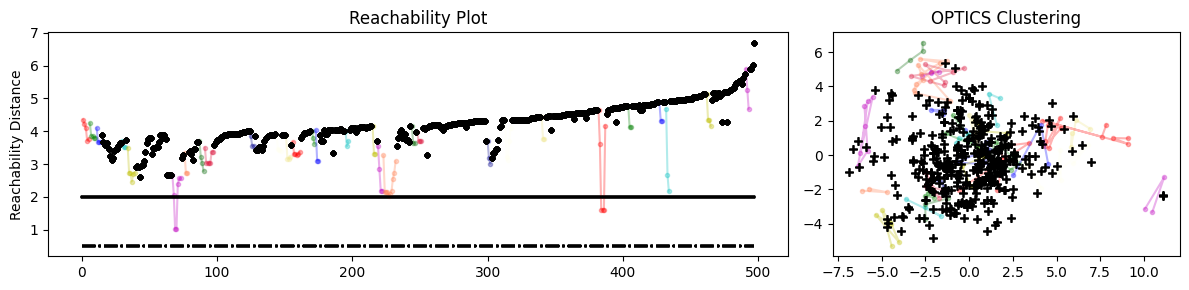

[['APOG', 'ASPU', 'KALV', 'MGY', 'NOVNQ'],
 ['IMBIQ', 'MOMO', 'MPV', 'SUPV', 'YPF'],
 ['ATNXQ', 'FTAI', 'MRNS', 'PARR'],
 ['FRBK', 'NBN', 'WHG'],
 ['BHLB', 'CFR', 'CTBI', 'HOMB', 'PACW', 'SYBT'],
 ['CSM', 'IUSV', 'IWS', 'IYY', 'MGC', 'MGV', 'SCHX'],
 ['CSML', 'MLI', 'RZV'],
 ['IXN', 'IYW', 'MGK', 'ONEQ'],
 ['AAPL', 'ICVT', 'LRCX', 'MKSI', 'SNSR', 'TSM', 'TXN'],
 ['AYI', 'MLM', 'SAVE'],
 ['IHIT', 'NAZ', 'NXC', 'TVE'],
 ['DTF', 'MHN', 'MYN', 'NBH'],
 ['IQI', 'KSM', 'MHI', 'MIY', 'MNP', 'NAN'],
 ['BCPC', 'SENEA', 'WDFC'],
 ['ANGL', 'BSJN', 'BSJO'],
 ['ASMB', 'CX', 'SNY'],
 ['EWW', 'MXF', 'PAC'],
 ['AIA', 'EEMO', 'FNDE', 'VWO'],
 ['EZU', 'FAN', 'IEFA', 'IEUR', 'IVLU', 'MXI', 'SCHC', 'VEA', 'VSS', 'VYMI'],
 ['POOL', 'SON', 'UPS'],
 ['JBHT', 'MRTN', 'SAIA', 'YELLQ'],
 ['CHK', 'HAL', 'VNOM'],
 ['CEF', 'GDX', 'MUX', 'PPLT', 'SA'],
 ['MITK', 'MODN', 'MTCH'],
 ['AGG', 'AGGY', 'BIV', 'FLCO', 'IBML', 'VCIT'],
 ['FBT', 'GILD', 'IHE'],
 ['D', 'NI', 'PEG'],
 ['IYR', 'RWO', 'RWR'],
 ['ARR', 'MFA', 'MO

In [186]:
# Think it's possible but need better data and consider etfs?
# Idea now is to use multiple clusters found by pca to form MR portfolio

cluster_pipe = ClusterPipeline(pca_factors=15, min_samples=3, xi=0.05)
portfolio_pipe = PortfolioPipeline()
clusters = [train_df.columns] if train_df.shape[1] < 15 else cluster_pipe.find_clusters(train_df)
# flattened_rep_stocks = [item for sublist in clusters for item in sublist]
display(clusters)
# flattened_rep_stocks = [item for sublist in clusters for item in sublist]
# print(flattened_rep_stocks)
# print(len(flattened_rep_stocks))
# rep_train_df = train_df.loc[:, flattened_rep_stocks]
# rep_train_valid_df = train_valid_df.loc[:, flattened_rep_stocks]

In [ ]:
# FAILED EXPERIMENT

# using "cointegrating" pairs and forming a mean reverting portfolio with them doesn't work 
# since as long as a pair breaks down the portfolio will break
# it's better to have multiple pairs then u can disable / update each correspondingly
cluster_pipe = ClusterPipeline()
portfolio_pipe = PortfolioPipeline()
clusters = [train_df.columns] if train_df.shape[1] < 15 else cluster_pipe.find_clusters(train_df)
pairs = portfolio_pipe.find_pairs_from_clusters(train_df, clusters)

pairs_df_data = {}

for idx, stock1, stock2, beta, *_ in pairs.itertuples():
    pairs_df_data[stock1+'-'+stock2] = train_valid_df[stock1] - beta * train_valid_df[stock2]

pairs_train_valid_df = pd.DataFrame(pairs_df_data, index=train_valid_df.index)
pairs_train_df = pairs_train_valid_df.loc[pairs_train_valid_df.index<=train_df.index[-1]]
# display(pairs_train_df)
# display(pairs_train_valid_df)

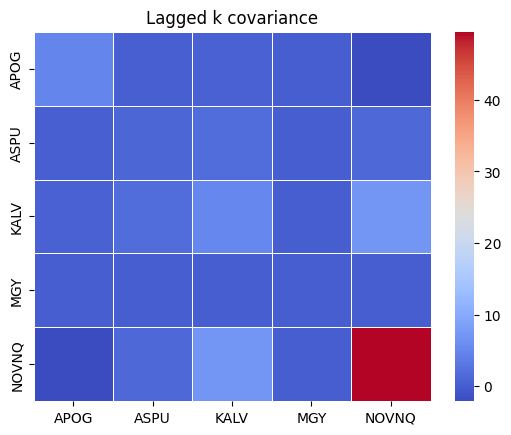

array([-0.07552581,  0.11151789,  0.04086307,  0.98995578, -0.01331798])

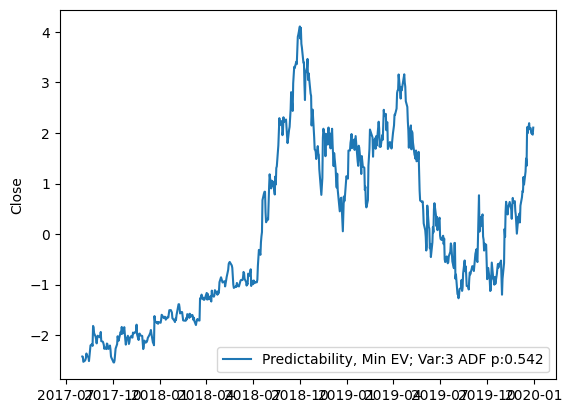

array([[ 0.73296308,  0.02957179,  0.04937472,  0.01669863, -0.03793914],
       [ 0.02957179,  0.8273029 ,  0.09319316, -0.0458528 , -0.02204977],
       [ 0.04937472,  0.09319316,  0.88079334, -0.02444644,  0.04481222],
       [ 0.01669863, -0.0458528 , -0.02444644,  0.44451835,  0.00393973],
       [-0.03793914, -0.02204977,  0.04481222,  0.00393973,  0.89787991]])

0         1         2         3          4
2017-08-03  5.243657 -0.760880 -5.504444 -0.166653  14.186400
2017-08-04  5.256823 -0.950852 -5.174793 -0.138331  18.941068
2017-08-07  5.431368 -0.811113 -5.286883 -0.160434  16.421535
2017-08-08  5.268128 -0.885556 -5.345164 -0.163248  15.715340
2017-08-09  5.059548 -0.969795 -5.724614 -0.166399  13.654687
...              ...       ...       ...       ...        ...
2019-12-24 -5.393000  1.037072  2.368605  0.310209   1.425744
2019-12-26 -5.390230  0.913132  2.505758  0.378529   5.275821
2019-12-27 -5.441512  0.833605  1.384817  0.370231   3.967015
2019-12-30 -5.678907  0.914105  1.116223  0.332171   3.426165
2019-12-31 -5.303345  1.322165  2.624760  0.308731   3.033362

[607 rows x 5 columns]

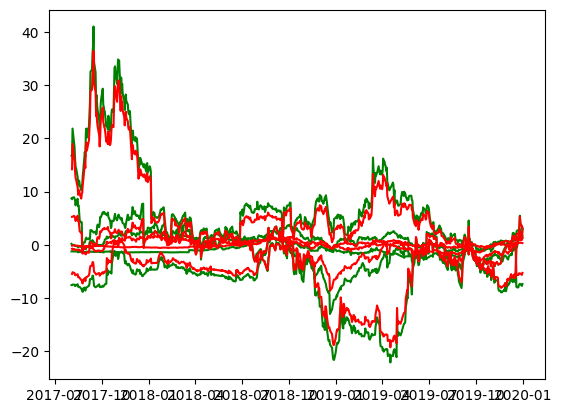

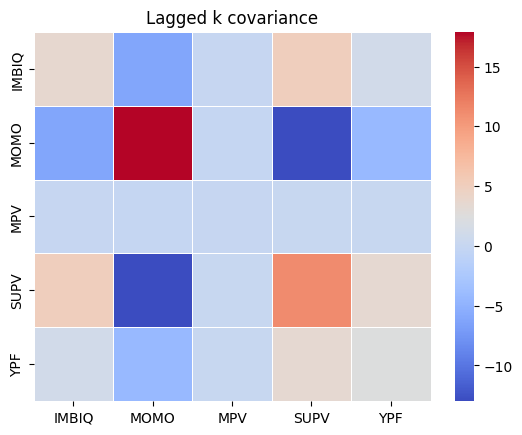

array([-0.04923532, -0.45260588,  0.79958308, -0.37316886, -0.11889364])

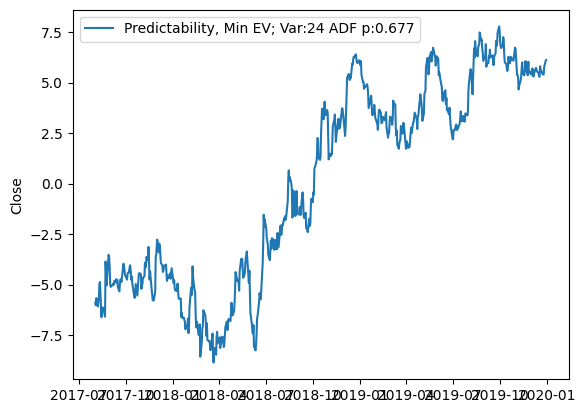

array([[ 0.86204955, -0.08253932, -0.00567981,  0.05050656, -0.05743668],
       [-0.08253932,  0.72543145,  0.06360092, -0.18190822, -0.05511106],
       [-0.00567981,  0.06360092,  0.49269553,  0.02347827,  0.04338339],
       [ 0.05050656, -0.18190822,  0.02347827,  0.69856665,  0.01676983],
       [-0.05743668, -0.05511106,  0.04338339,  0.01676983,  0.91234504]])

0         1         2         3         4
2017-08-03  1.730146  3.503774 -0.098199  1.635039  2.449237
2017-08-04  1.260283  3.349930 -0.074260  1.613743  2.132624
2017-08-07  0.896619  4.392079  0.043768  1.228949  1.849574
2017-08-08  0.924758  4.379463  0.008514  1.047940  1.350557
2017-08-09  0.679184  4.231976 -0.083724  0.861724  1.328205
...              ...       ...       ...       ...       ...
2019-12-24 -4.545663  2.885668  0.356511 -7.123601 -4.354654
2019-12-26 -4.591050  2.813985  0.480638 -6.822881 -4.116057
2019-12-27 -4.374335  2.438810  0.466548 -6.874362 -4.125982
2019-12-30 -4.282571  2.249712  0.463558 -6.956720 -4.349426
2019-12-31 -4.202028  1.964823  0.345154 -6.922919 -4.322748

[607 rows x 5 columns]

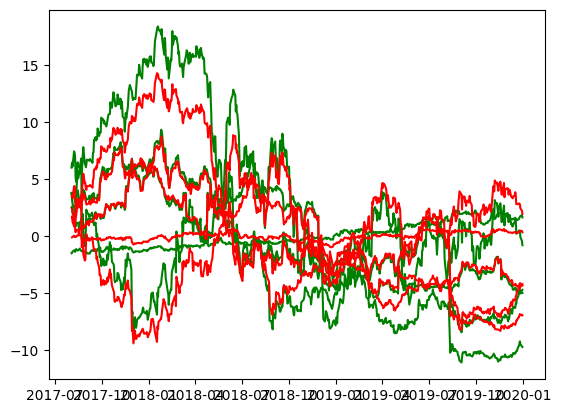

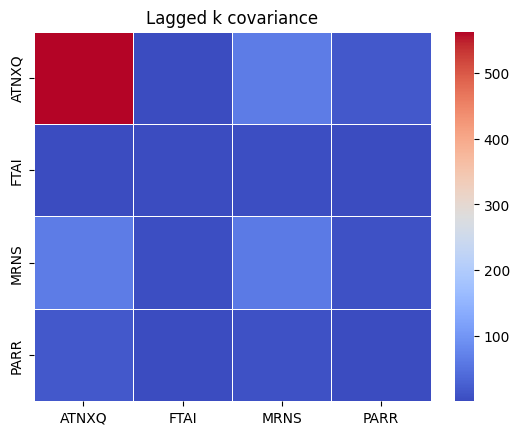

array([ 0.42277572,  0.83883687, -0.28047394, -0.19735187])

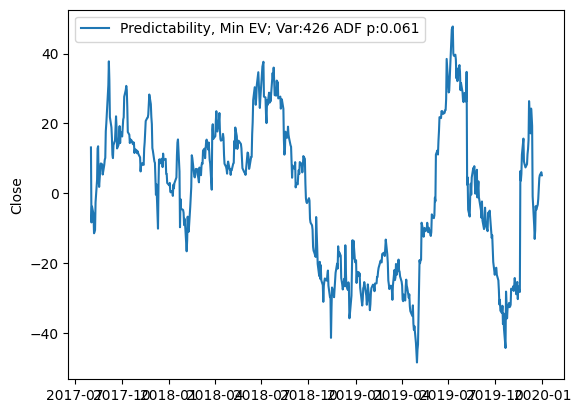

array([[ 0.80075387, -0.04787862,  0.04529389,  0.08799303],
       [-0.04787862,  0.68838226,  0.07196017,  0.02362095],
       [ 0.04529389,  0.07196017,  0.87215761,  0.06532826],
       [ 0.08799303,  0.02362095,  0.06532826,  0.83069221]])

0         1          2         3
2017-08-03 -22.286085  0.209022 -10.682444 -4.705801
2017-08-04 -13.450227 -0.112826  -9.340610 -3.728848
2017-08-07 -16.601453 -0.010881  -8.600170 -4.098742
2017-08-08 -28.077700  0.702628 -10.008865 -5.964210
2017-08-09 -26.934969  0.555368  -9.677157 -5.823658
...               ...       ...        ...       ...
2019-12-24 -10.826238  2.547205  -7.118719  2.776826
2019-12-26  -0.307286  1.956796  -7.047846  3.736069
2019-12-27   0.903046  1.762500  -7.341691  3.285871
2019-12-30   2.139335  1.642904  -7.639055  3.142777
2019-12-31   0.694627  1.606584  -7.774890  2.886385

[607 rows x 4 columns]

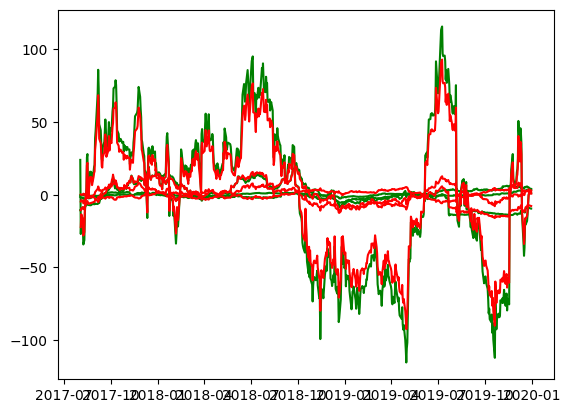

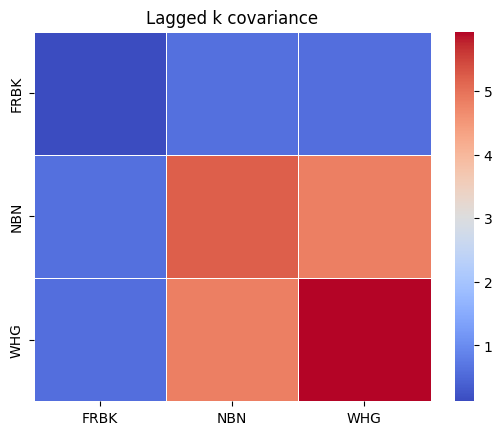

array([ 0.99490674, -0.03892442, -0.092981  ])

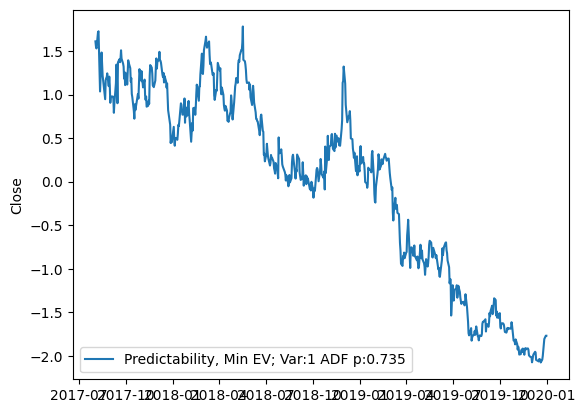

array([[0.62405986, 0.02079226, 0.02327545],
       [0.02079226, 0.87497496, 0.1161883 ],
       [0.02327545, 0.1161883 , 0.82148133]])

0         1         2
2017-08-03  1.409259  0.127527  4.642048
2017-08-04  1.504111  0.407249  5.696870
2017-08-07  1.591280  0.571018  5.318668
2017-08-08  1.586190  0.391375  5.262571
2017-08-09  1.424580  0.288839  5.114858
...              ...       ...       ...
2019-12-24 -1.946801 -0.537540 -7.226080
2019-12-26 -1.909221 -0.666909 -7.604341
2019-12-27 -1.882773 -0.658756 -7.795686
2019-12-30 -1.856954 -0.630513 -7.783054
2019-12-31 -1.868001 -0.824377 -7.817063

[607 rows x 3 columns]

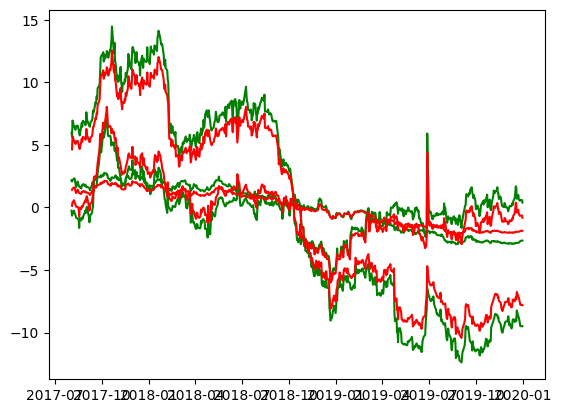

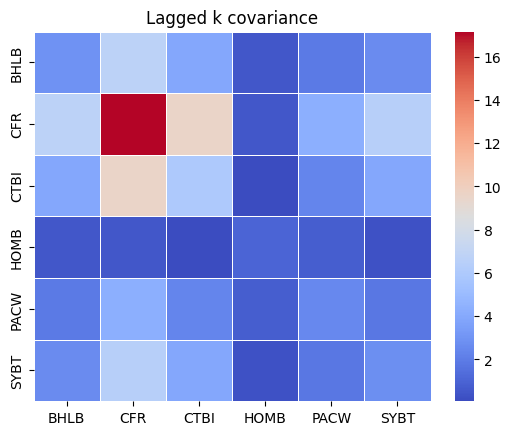

array([ 0.50676502, -0.09803233, -0.59546884, -0.18863959, -0.09510436,
        0.57824389])

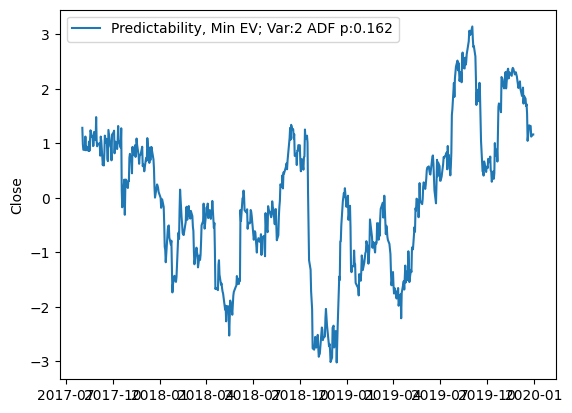

array([[ 0.63131342,  0.12729132,  0.14704812,  0.12749294,  0.04046623,
        -0.04871172],
       [ 0.12729132,  0.86864583,  0.06937437, -0.06983688, -0.03083457,
         0.02449097],
       [ 0.14704812,  0.06937437,  0.64004364, -0.06939534, -0.00887003,
         0.18500585],
       [ 0.12749294, -0.06983688, -0.06939534,  0.86606649,  0.02456323,
        -0.01391874],
       [ 0.04046623, -0.03083457, -0.00887003,  0.02456323,  0.81888181,
         0.0397017 ],
       [-0.04871172,  0.02449097,  0.18500585, -0.01391874,  0.0397017 ,
         0.56261518]])

0         1         2         3         4         5
2017-08-03 -0.783457 -7.563119 -2.775978  3.228638  1.228554 -1.647892
2017-08-04 -0.665365 -7.613442 -2.624086  3.308007  1.407767 -1.605922
2017-08-07 -1.111737 -8.052785 -2.946807  3.302616  1.156804 -1.665237
2017-08-08 -0.903079 -8.245463 -2.878862  3.401328  1.160141 -1.641793
2017-08-09 -1.545550 -9.215723 -3.251661  3.199984  0.718593 -1.906117
...              ...       ...       ...       ...       ...       ...
2019-12-24  0.056382  2.071385  3.272108 -1.151813 -1.329160  3.817180
2019-12-26  0.123367  2.370887  3.079972 -1.071175 -1.392991  3.623452
2019-12-27 -0.101237  2.076449  2.894161 -1.148013 -1.671189  3.399913
2019-12-30 -0.047190  2.209788  3.067785 -1.127056 -1.696784  3.578933
2019-12-31 -0.059571  1.936871  3.019442 -1.055286 -1.671405  3.521268

[607 rows x 6 columns]

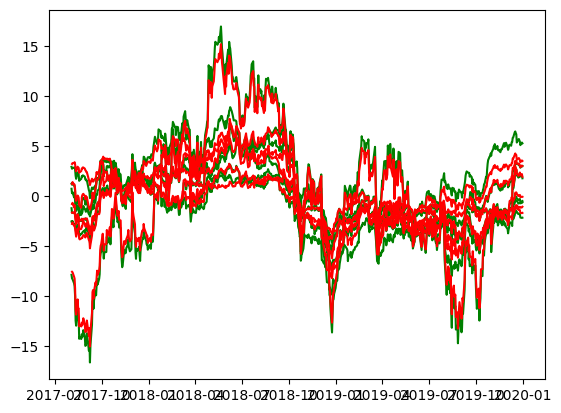

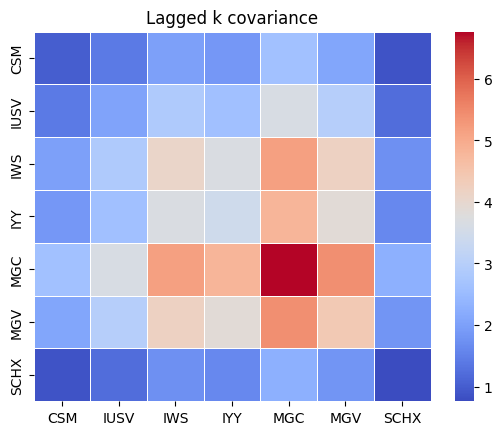

array([-0.05022702,  0.18852979, -0.10402841, -0.42350537,  0.04706938,
       -0.04134149,  0.87625933])

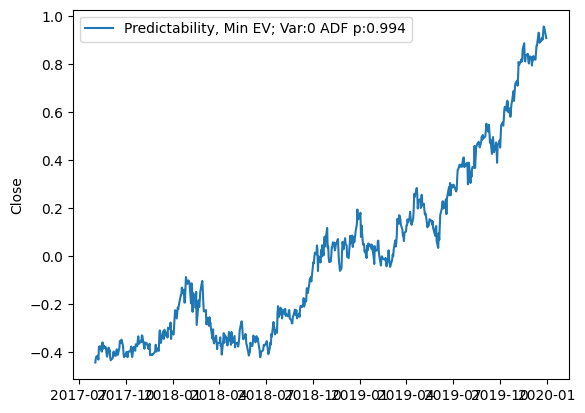

array([[ 0.71329819,  0.05331581, -0.07501143,  0.01415395,  0.15832163,
        -0.04408661,  0.01664934],
       [ 0.05331581,  0.59686283,  0.17696851, -0.05630552, -0.01552978,
         0.20027811, -0.12084272],
       [-0.07501143,  0.17696851,  0.65017329,  0.09845263,  0.07375101,
        -0.01349549,  0.07755579],
       [ 0.01415395, -0.05630552,  0.09845263,  0.5965916 ,  0.09906668,
         0.0835346 ,  0.31058768],
       [ 0.15832163, -0.01552978,  0.07375101,  0.09906668,  0.72966692,
         0.02576017,  0.03118167],
       [-0.04408661,  0.20027811, -0.01349549,  0.0835346 ,  0.02576017,
         0.74096243,  0.0266319 ],
       [ 0.01664934, -0.12084272,  0.07755579,  0.31058768,  0.03118167,
         0.0266319 ,  0.18789064]])

0         1         2          3          4          5  \
2017-08-03 -4.420373 -4.126071 -5.603017  -8.382932 -11.185044  -7.606780   
2017-08-04 -4.382585 -4.031935 -5.481654  -8.283586 -11.061165  -7.464494   
2017-08-07 -4.306772 -4.074372 -5.495208  -8.207672 -10.936913  -7.521871   
2017-08-08 -4.326875 -4.122696 -5.609091  -8.319172 -11.094275  -7.565347   
2017-08-09 -4.326976 -4.229478 -5.864697  -8.407335 -11.133561  -7.582973   
...              ...       ...       ...        ...        ...        ...   
2019-12-24  5.706389  7.647606  9.511308  11.529206  15.260869  11.246774   
2019-12-26  5.863982  7.771410  9.751956  11.881418  15.764541  11.468829   
2019-12-27  5.894924  7.767392  9.694374  11.878931  15.778285  11.486628   
2019-12-30  5.682578  7.560327  9.439091  11.470388  15.209484  11.091479   
2019-12-31  5.783568  7.746195  9.723985  11.673950  15.418656  11.286427   

                   6  
2017-08-03 -3.841438  
2017-08-04 -3.797026  
2017-08-07 -3.757841  
2017-08-08 -3.809642  
2017-08-09 -3.858226  
...              ...  
2019-12-24  5.096000  
2019-12-26  5.260742  
2019-12-27  5.255437  
2019-12-30  5.071889  
2019-12-31  5.167827  

[607 rows x 7 columns]

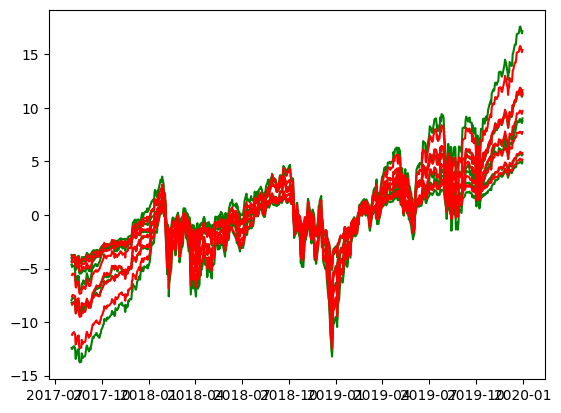

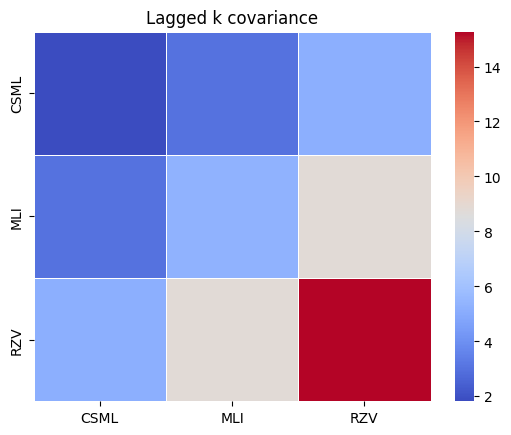

array([ 0.09710935, -0.83472291,  0.54204007])

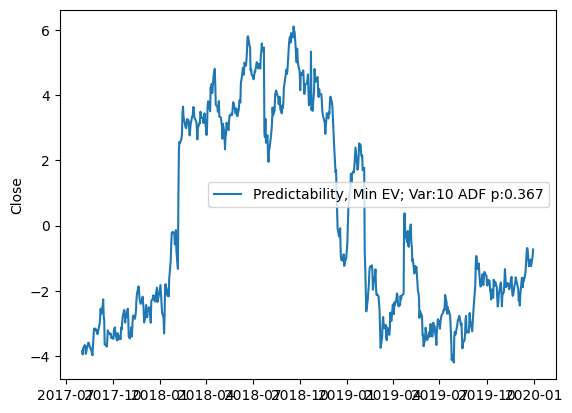

array([[0.91338152, 0.03139762, 0.01666915],
       [0.03139762, 0.80909518, 0.10610739],
       [0.01666915, 0.10610739, 0.89695534]])

0         1         2
2017-08-03 -1.463034 -0.114204 -5.285872
2017-08-04 -1.302201  0.081817 -4.745994
2017-08-07 -1.339825 -0.124316 -4.932351
2017-08-08 -1.446770 -0.229900 -5.124186
2017-08-09 -1.814207 -0.523686 -5.829764
...              ...       ...       ...
2019-12-24  1.335636  2.301384  1.830900
2019-12-26  1.326118  2.435649  2.095508
2019-12-27  1.174842  2.093425  1.324778
2019-12-30  1.173472  2.285651  2.012016
2019-12-31  1.217913  2.194108  2.168416

[607 rows x 3 columns]

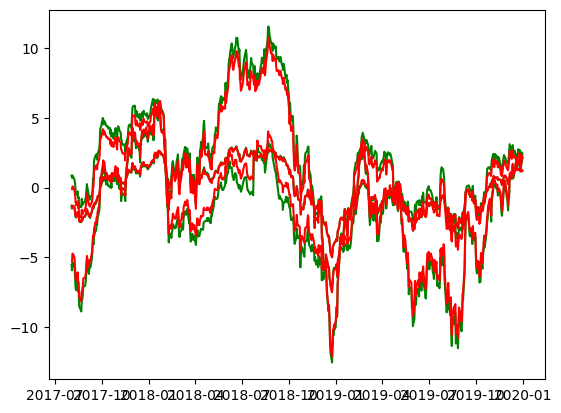

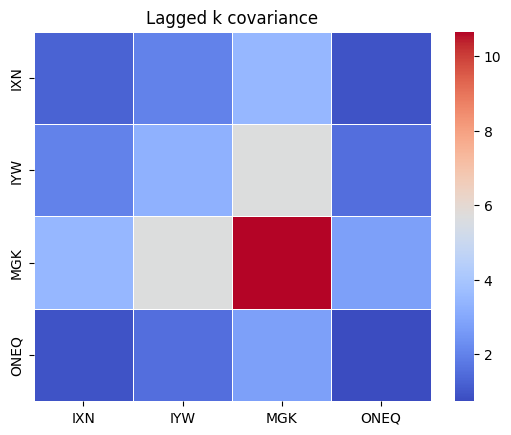

array([-0.44800593,  0.33149243, -0.2536633 ,  0.79060634])

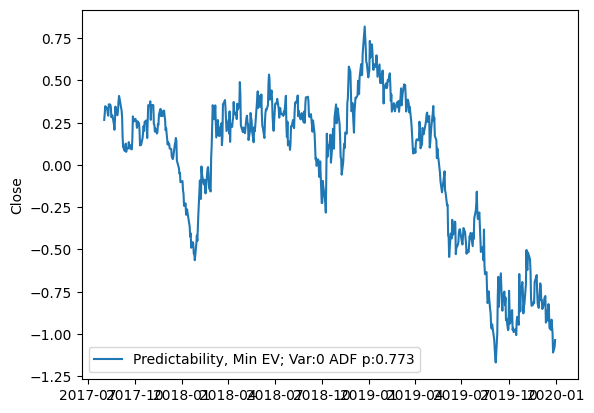

array([[ 0.84622024,  0.10197339, -0.02474119,  0.07762857],
       [ 0.10197339,  0.88337318,  0.0313417 , -0.04268744],
       [-0.02474119,  0.0313417 ,  0.92594167,  0.0710744 ],
       [ 0.07762857, -0.04268744,  0.0710744 ,  0.70445714]])

0          1          2         3
2017-08-03 -5.027005  -9.207463 -18.052877 -4.544852
2017-08-04 -4.996223  -9.099246 -17.991211 -4.515979
2017-08-07 -4.848427  -8.880940 -17.572084 -4.397919
2017-08-08 -4.860993  -8.921715 -17.810262 -4.471113
2017-08-09 -4.899038  -8.924373 -17.860544 -4.527083
...              ...        ...        ...       ...
2019-12-24  7.237224  12.379609  24.071530  5.916419
2019-12-26  7.503413  12.859866  25.274320  6.190312
2019-12-27  7.540590  12.807877  25.274215  6.142312
2019-12-30  7.293366  12.409191  24.361901  5.902679
2019-12-31  7.431047  12.539111  24.586140  6.030013

[607 rows x 4 columns]

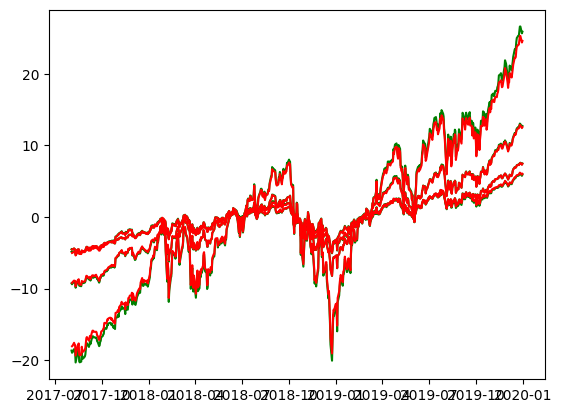

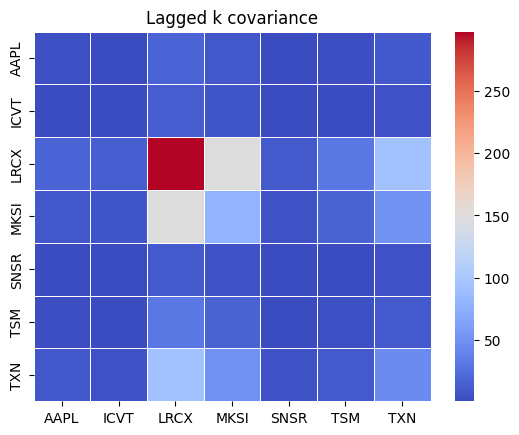

array([-0.29414739, -0.66272559, -0.15506123, -0.11830082,  0.55469964,
        0.32249926,  0.15663835])

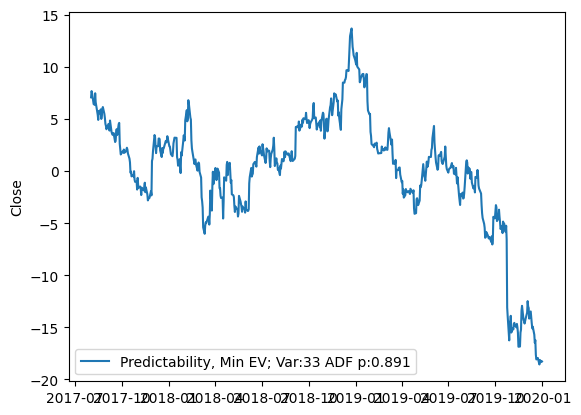

array([[ 0.89722219, -0.1066491 , -0.00193316, -0.07728794,  0.07168622,
         0.02629213,  0.05496686],
       [-0.1066491 ,  0.57885284, -0.01539175, -0.00412304,  0.11543707,
        -0.02617298,  0.04968481],
       [-0.00193316, -0.01539175,  0.91552674,  0.04576349,  0.0796946 ,
         0.07369462,  0.0109636 ],
       [-0.07728794, -0.00412304,  0.04576349,  0.82686475, -0.0097048 ,
         0.07924811,  0.05248521],
       [ 0.07168622,  0.11543707,  0.0796946 , -0.0097048 ,  0.66495489,
        -0.06171575, -0.00489037],
       [ 0.02629213, -0.02617298,  0.07369462,  0.07924811, -0.06171575,
         0.59579982, -0.04817058],
       [ 0.05496686,  0.04968481,  0.0109636 ,  0.05248521, -0.00489037,
        -0.04817058,  0.91197446]])

0         1          2          3          4          5  \
2017-08-03  -8.511579 -2.144060 -39.766973 -15.645749  -4.765025  -6.808691   
2017-08-04  -8.359346 -2.185463 -38.785826 -15.279169  -4.716840  -6.571624   
2017-08-07  -8.000832 -2.213594 -33.852302 -13.196395  -4.285501  -5.636696   
2017-08-08  -7.730846 -2.327122 -33.913527 -12.943792  -4.301529  -5.661873   
2017-08-09  -7.537105 -2.400164 -34.381650 -12.965630  -4.366714  -5.799934   
...               ...       ...        ...        ...        ...        ...   
2019-12-24  20.203905  0.565272  96.710901  21.624108  11.999296  18.124358   
2019-12-26  21.413038  0.519725  97.148461  21.792232  12.227384  18.474618   
2019-12-27  21.496780  0.548136  96.047311  20.727642  12.152133  18.402738   
2019-12-30  21.807256  0.288441  94.998216  20.890872  11.979853  18.082695   
2019-12-31  22.361505  0.359712  94.866074  20.213080  12.056161  18.123971   

                    6  
2017-08-03 -24.255276  
2017-08-04 -24.167592  
2017-08-07 -23.423217  
2017-08-08 -23.184528  
2017-08-09 -23.295826  
...               ...  
2019-12-24  22.517664  
2019-12-26  22.552148  
2019-12-27  22.535352  
2019-12-30  21.841062  
2019-12-31  22.332464  

[607 rows x 7 columns]

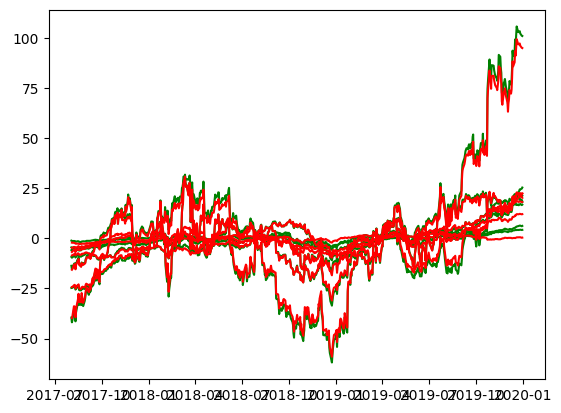

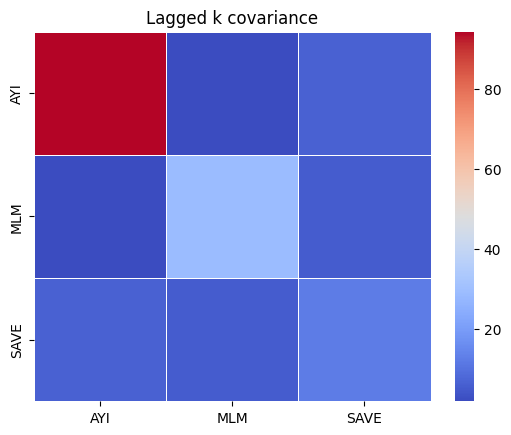

array([-0.37445898, -0.92478281,  0.06750718])

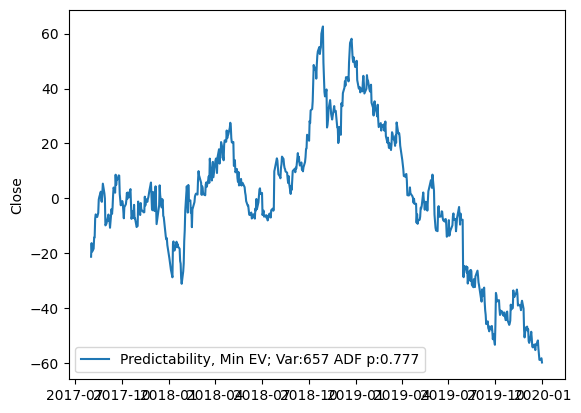

array([[ 0.83430413, -0.10619756, -0.00516647],
       [-0.10619756,  0.61810229,  0.02926883],
       [-0.00516647,  0.02926883,  0.94526112]])

0          1         2
2017-08-03  49.553415 -10.299485 -4.720406
2017-08-04  49.084969  -8.190278 -4.818725
2017-08-07  47.410819  -8.230133 -5.386654
2017-08-08  46.819156 -10.533375 -5.778715
2017-08-09  44.558691  -9.630970 -5.801699
...               ...        ...       ...
2019-12-24  -8.192837  37.112725 -0.805717
2019-12-26  -7.526916  39.458963 -0.675919
2019-12-27  -7.659532  39.471340 -1.222759
2019-12-30  -7.478172  38.986308 -1.925333
2019-12-31  -7.520214  39.990580 -1.434179

[607 rows x 3 columns]

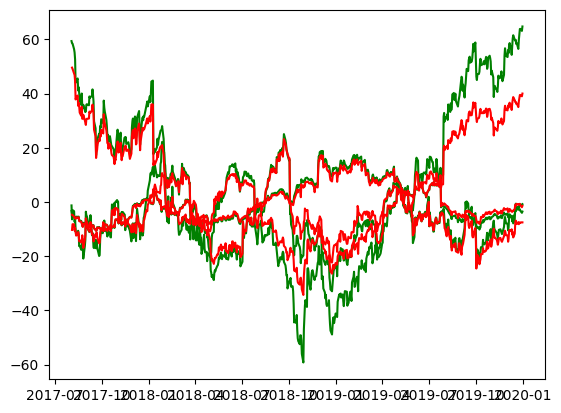

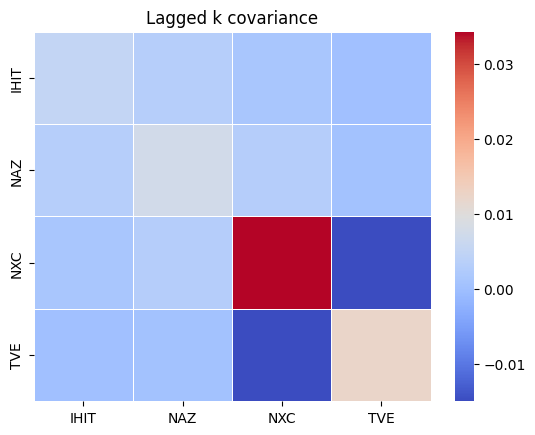

array([-0.11883468,  0.24645882, -0.65032857, -0.70866714])

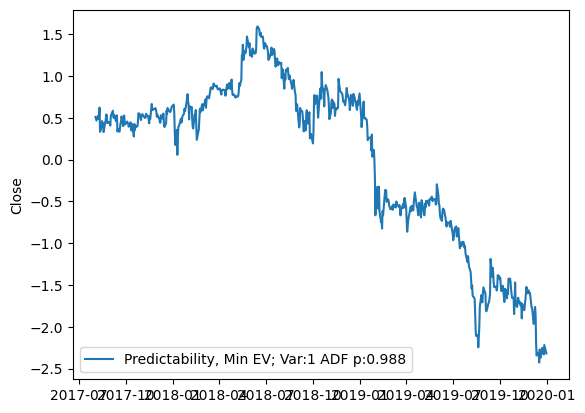

array([[ 0.68478369,  0.08952479, -0.00851415, -0.02833144],
       [ 0.08952479,  0.6298615 ,  0.00358618,  0.10213124],
       [-0.00851415,  0.00358618,  0.59056143, -0.27904937],
       [-0.02833144,  0.10213124, -0.27904937,  0.57991212]])

0         1         2         3
2017-08-03 -0.291845  0.341775  0.533770 -0.518184
2017-08-04 -0.273809  0.313272  0.539215 -0.527016
2017-08-07 -0.295029  0.317315  0.483591 -0.494146
2017-08-08 -0.319032  0.276264  0.515924 -0.519260
2017-08-09 -0.283848  0.300138  0.471502 -0.492195
...              ...       ...       ...       ...
2019-12-24  0.596003  0.760254  0.882769  0.267882
2019-12-26  0.592410  0.743544  0.900703  0.265255
2019-12-27  0.562380  0.734821  0.841398  0.276876
2019-12-30  0.541675  0.653254  0.931821  0.199773
2019-12-31  0.597751  0.713467  0.993069  0.164470

[607 rows x 4 columns]

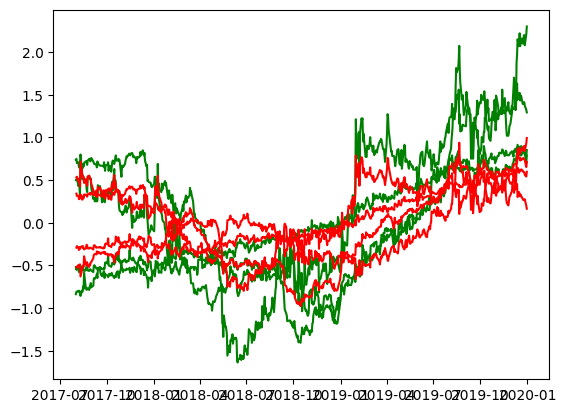

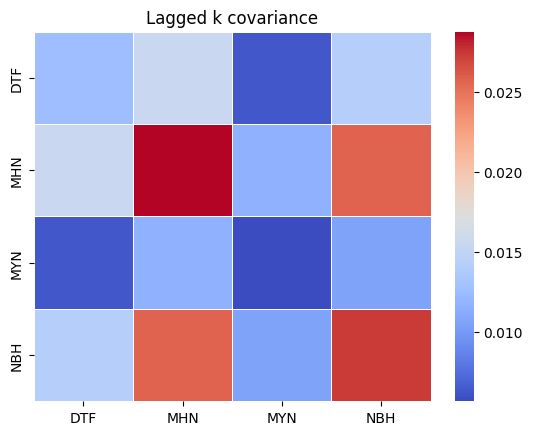

array([ 0.27888567, -0.39102027,  0.87578301, -0.04827069])

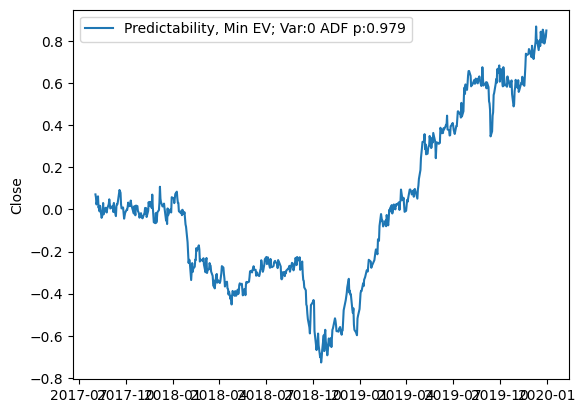

array([[ 0.71968422,  0.13409884, -0.09700929, -0.00398364],
       [ 0.13409884,  0.6181154 ,  0.1432353 ,  0.21106452],
       [-0.09700929,  0.1432353 ,  0.32906536,  0.117988  ],
       [-0.00398364,  0.21106452,  0.117988  ,  0.63563498]])

0         1         2         3
2017-08-03  0.282043  0.351346  0.094304  0.224074
2017-08-04  0.223635  0.303003  0.079636  0.170027
2017-08-07  0.231854  0.286215  0.078608  0.153616
2017-08-08  0.164958  0.273430  0.078885  0.130097
2017-08-09  0.161933  0.236999  0.062846  0.072088
...              ...       ...       ...       ...
2019-12-24  1.200007  1.384433  0.537784  1.447577
2019-12-26  1.177022  1.380576  0.534415  1.386259
2019-12-27  1.066837  1.382338  0.557780  1.368028
2019-12-30  1.146550  1.332698  0.515618  1.314163
2019-12-31  1.112674  1.347159  0.543031  1.358360

[607 rows x 4 columns]

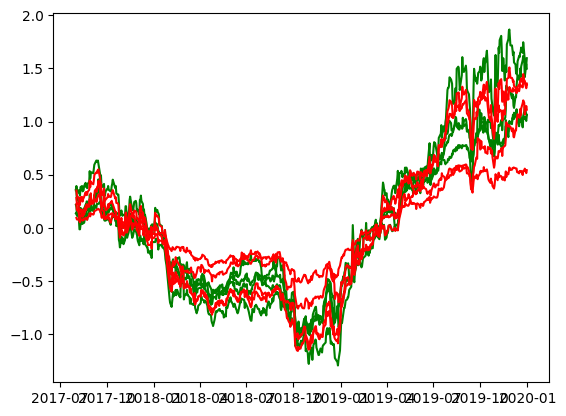

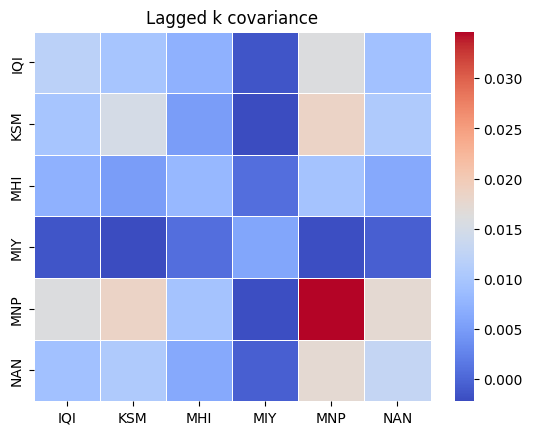

array([-0.21307208, -0.58716884,  0.04386374, -0.66815475, -0.17454104,
        0.36195811])

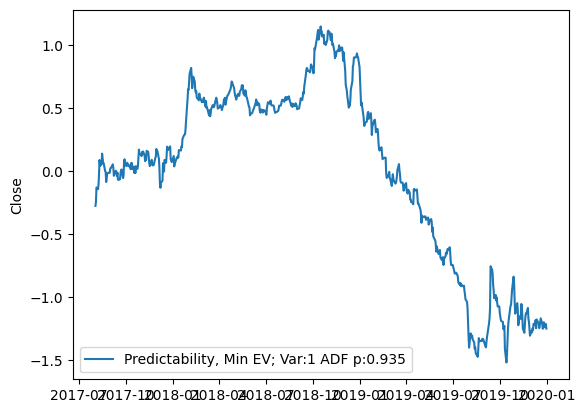

array([[ 0.71130438,  0.04208561,  0.12519031, -0.1112604 ,  0.07331547,
        -0.0019398 ],
       [ 0.04208561,  0.67601826, -0.04222336, -0.11328237, -0.00511617,
         0.07794251],
       [ 0.12519031, -0.04222336,  0.69364005,  0.02349353,  0.01143199,
         0.03254985],
       [-0.1112604 , -0.11328237,  0.02349353,  0.6864659 , -0.05240283,
         0.03734891],
       [ 0.07331547, -0.00511617,  0.01143199, -0.05240283,  0.83631678,
         0.09121647],
       [-0.0019398 ,  0.07794251,  0.03254985,  0.03734891,  0.09121647,
         0.75025121]])

0         1         2         3         4         5
2017-08-03 -0.032138  0.337153 -0.225954 -0.097218  0.429652  0.236571
2017-08-04 -0.037933  0.265830 -0.259603 -0.130247  0.346569  0.184032
2017-08-07 -0.043268  0.285785 -0.248642 -0.109566  0.349979  0.232930
2017-08-08 -0.051133  0.291048 -0.278001 -0.148647  0.290008  0.193136
2017-08-09 -0.097549  0.218044 -0.269108 -0.142415  0.241881  0.150670
...              ...       ...       ...       ...       ...       ...
2019-12-24  0.801943  0.619722  0.803059  0.565811  1.264796  1.253473
2019-12-26  0.784995  0.588690  0.847737  0.587720  1.173604  1.257731
2019-12-27  0.766920  0.598398  0.772921  0.604463  1.142912  1.231404
2019-12-30  0.753312  0.590583  0.742653  0.594418  1.108476  1.216944
2019-12-31  0.763978  0.585085  0.757429  0.626892  1.107505  1.219293

[607 rows x 6 columns]

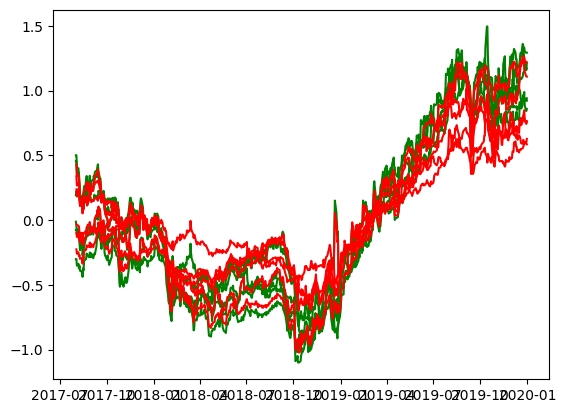

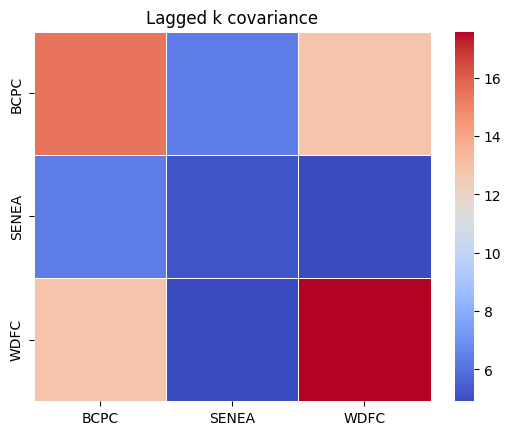

array([ 0.34170288, -0.85510269, -0.38992118])

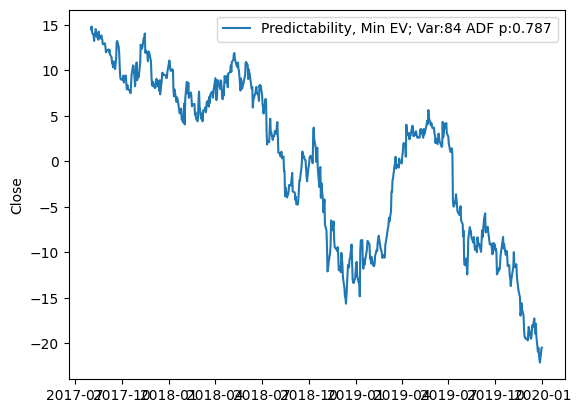

array([[ 0.92722601,  0.02791125,  0.05590405],
       [ 0.02791125,  0.81626857, -0.02528339],
       [ 0.05590405, -0.02528339,  0.89802374]])

0         1          2
2017-08-03 -16.022953 -0.429668 -43.245354
2017-08-04 -15.161812  0.840161 -43.922766
2017-08-07 -17.829152 -0.157866 -43.365039
2017-08-08 -18.974124  0.058498 -43.647931
2017-08-09 -18.779981 -0.410353 -44.103159
...               ...       ...        ...
2019-12-24  13.002716  6.973817  37.806668
2019-12-26  12.862540  8.187283  37.668572
2019-12-27  11.854987  8.159920  37.509413
2019-12-30  12.179703  7.731069  35.595096
2019-12-31  12.772045  8.010851  35.318268

[607 rows x 3 columns]

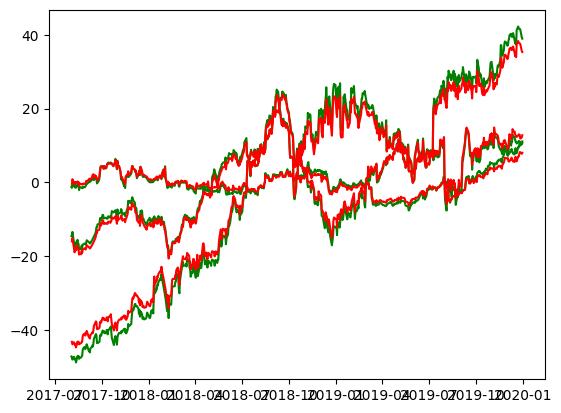

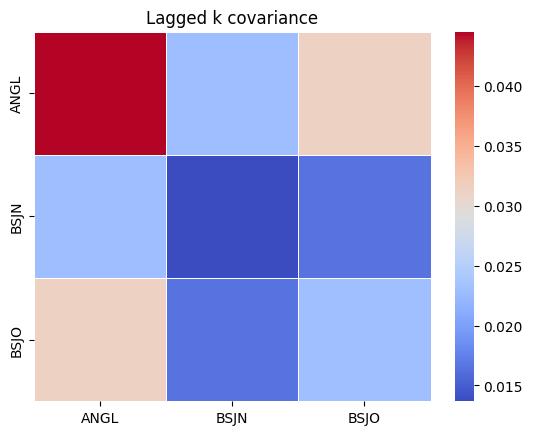

array([-0.502248  , -0.19283793,  0.8429475 ])

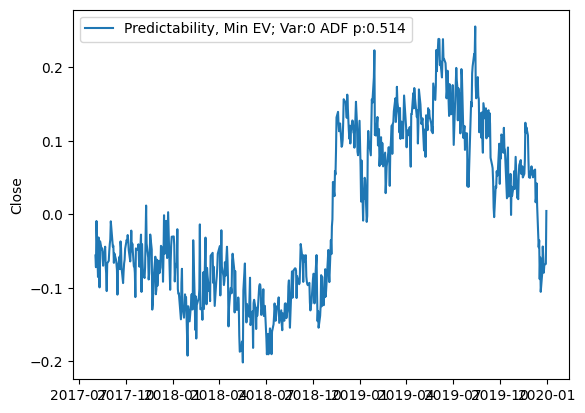

array([[0.63352069, 0.10094996, 0.36100024],
       [0.10094996, 0.52273802, 0.16454403],
       [0.36100024, 0.16454403, 0.31913052]])

0         1         2
2017-08-03 -0.841142 -0.538527 -0.630029
2017-08-04 -0.790656 -0.525917 -0.592123
2017-08-07 -0.795910 -0.529179 -0.601987
2017-08-08 -0.853659 -0.573846 -0.642385
2017-08-09 -0.919387 -0.621140 -0.693065
...              ...       ...       ...
2019-12-24  2.050552  1.202758  1.493471
2019-12-26  2.106863  1.222934  1.528834
2019-12-27  2.109463  1.219352  1.530380
2019-12-30  2.093183  1.215688  1.519968
2019-12-31  2.154927  1.252498  1.570839

[607 rows x 3 columns]

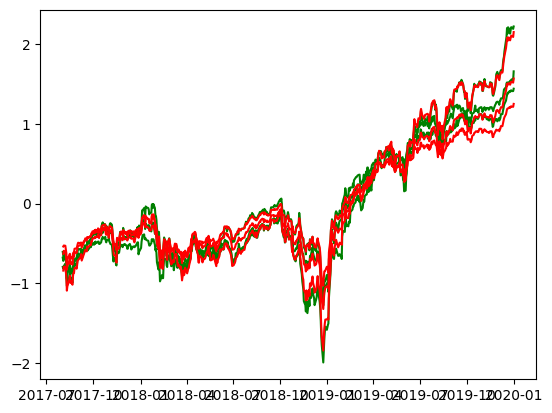

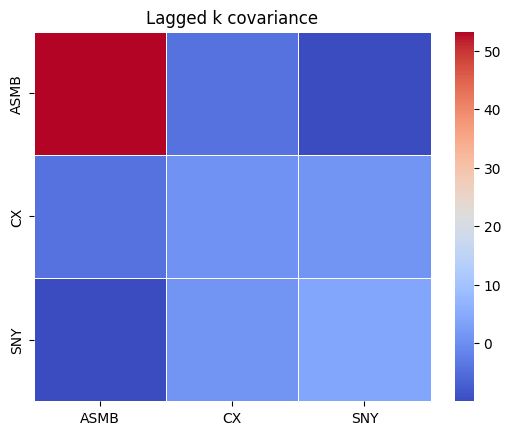

array([-0.36915945, -0.9083043 , -0.19673485])

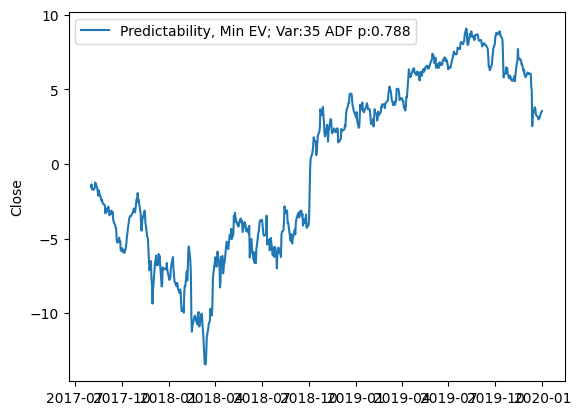

array([[ 9.32192856e-01, -2.17590130e-02, -3.92968621e-02],
       [-2.17590130e-02,  8.66407419e-01,  6.89011633e-04],
       [-3.92968621e-02,  6.89011633e-04,  9.28269976e-01]])

0         1         2
2017-08-03 -6.285493  3.339930  2.333170
2017-08-04 -5.806292  3.404002  2.618732
2017-08-07 -5.530722  3.330051  2.523738
2017-08-08 -5.527889  3.279771  2.486567
2017-08-09 -5.334034  3.199079  2.348689
...              ...       ...       ...
2019-12-24 -6.876240 -1.512880  6.862697
2019-12-26 -7.143735 -1.463318  6.781301
2019-12-27 -7.651521 -1.486213  7.256756
2019-12-30 -7.949030 -1.531091  6.731876
2019-12-31 -8.069997 -1.536926  6.736977

[607 rows x 3 columns]

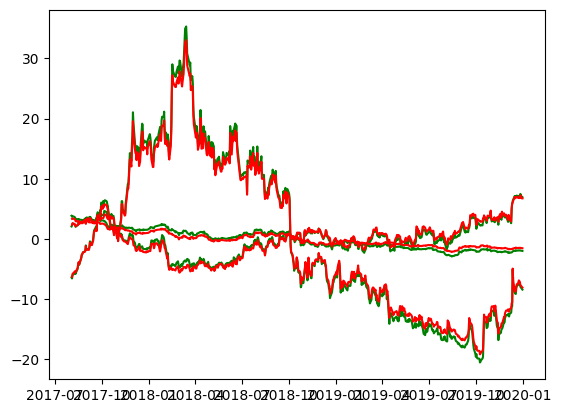

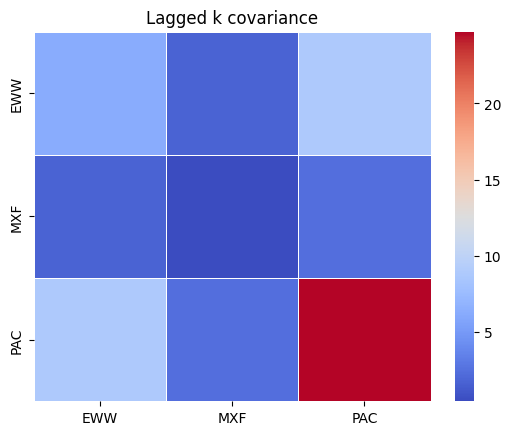

array([ 0.32840428, -0.9440832 ,  0.02928383])

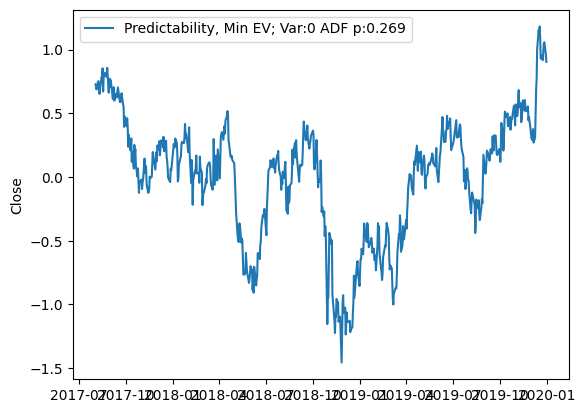

array([[0.88140595, 0.2371987 , 0.00445558],
       [0.2371987 , 0.28319487, 0.02482172],
       [0.00445558, 0.02482172, 0.95017602]])

0         1          2
2017-08-03  6.527627  2.360115   7.749773
2017-08-04  6.609375  2.389775   7.618346
2017-08-07  6.534386  2.345836   7.454314
2017-08-08  6.629687  2.378300   7.465006
2017-08-09  6.245612  2.196107   5.436167
...              ...       ...        ...
2019-12-24  0.075051  0.572797  23.887376
2019-12-26  0.299329  0.638384  24.362878
2019-12-27  0.391990  0.666527  24.316311
2019-12-30 -0.416706  0.372221  23.252119
2019-12-31 -0.357636  0.394968  22.912016

[607 rows x 3 columns]

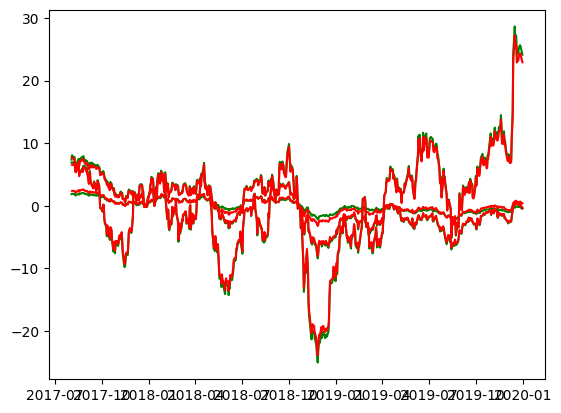

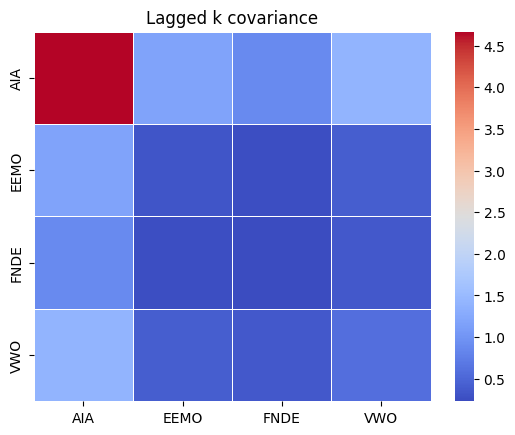

array([-0.08194753,  0.05091855,  0.75424112, -0.64947073])

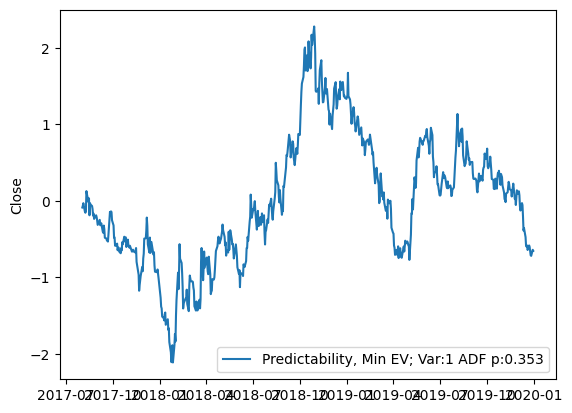

array([[ 0.97276348,  0.04105819, -0.00908272, -0.06035084],
       [ 0.04105819,  0.76337984,  0.05388215,  0.07392343],
       [-0.00908272,  0.05388215,  0.63746988,  0.10399931],
       [-0.06035084,  0.07392343,  0.10399931,  0.68672787]])

0         1         2         3
2017-08-03 -2.729460 -0.748711 -0.872108 -0.673837
2017-08-04 -2.713652 -0.681335 -0.782662 -0.595584
2017-08-07 -2.413787 -0.518891 -0.671331 -0.398305
2017-08-08 -2.166677 -0.490298 -0.695269 -0.441764
2017-08-09 -2.798673 -0.645292 -0.865777 -0.586542
...              ...       ...       ...       ...
2019-12-24  4.646887  1.297391  1.646561  1.938977
2019-12-26  5.047320  1.417844  1.796569  2.165020
2019-12-27  5.666500  1.477385  1.868734  2.181257
2019-12-30  5.309037  1.384339  1.761623  2.027548
2019-12-31  5.353468  1.443359  1.819424  2.104919

[607 rows x 4 columns]

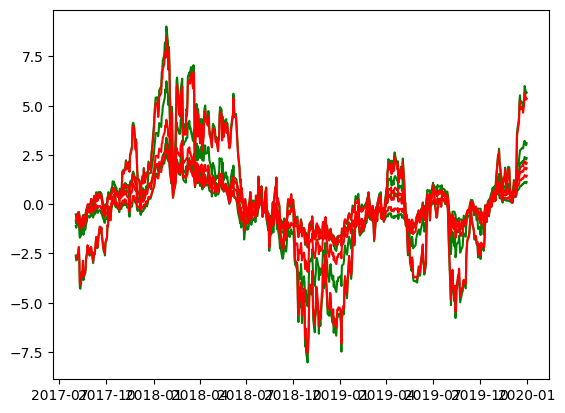

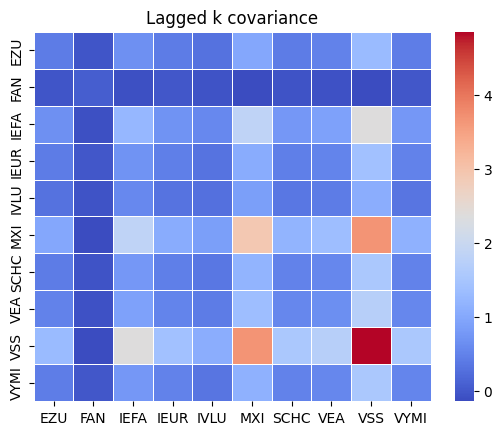

array([-0.24497066,  0.06999231,  0.55489541,  0.33598459, -0.59535499,
        0.1836419 ,  0.08615026, -0.1679135 , -0.1229254 , -0.27458425])

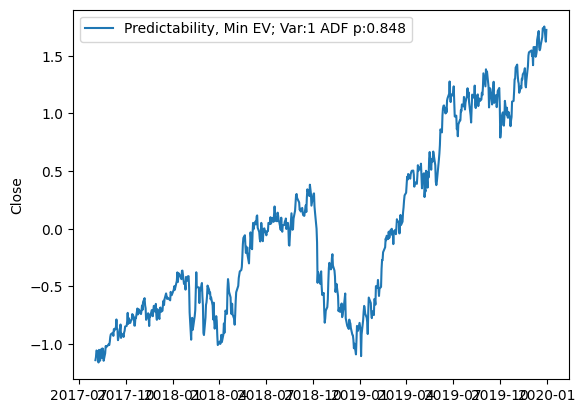

array([[ 5.99203213e-01,  1.73699597e-02,  1.69882771e-02,
         1.36213653e-01, -1.43391597e-01,  4.04072366e-02,
        -3.54260558e-04,  1.27433968e-01,  6.00711481e-02,
        -5.53549626e-02],
       [ 1.73699597e-02,  7.80961423e-01, -7.42406824e-02,
         3.72450896e-02,  2.49797517e-02,  1.78980294e-02,
        -1.25146654e-01, -8.37146594e-02, -6.33505204e-02,
         6.55577069e-02],
       [ 1.69882771e-02, -7.42406824e-02,  5.34740740e-01,
        -7.12445522e-02,  3.07342940e-01, -2.63589715e-02,
         3.69374131e-03,  2.12643503e-01,  2.99712559e-02,
         4.06571259e-02],
       [ 1.36213653e-01,  3.72450896e-02, -7.12445522e-02,
         5.72499298e-01,  9.65191053e-02, -4.44649564e-02,
         1.76486204e-01,  9.89475001e-03,  1.96551536e-02,
         1.90066558e-01],
       [-1.43391597e-01,  2.49797517e-02,  3.07342940e-01,
         9.65191053e-02,  5.31959539e-01,  1.38356828e-01,
         6.95475593e-02,  2.55189417e-02, -1.22753821e-01,
        -2.

0         1         2         3         4         5  \
2017-08-03 -0.309738  0.234572 -0.980948 -0.232217 -1.000191 -2.742714   
2017-08-04 -0.187510  0.237194 -0.954785 -0.173582 -0.998581 -2.582729   
2017-08-07 -0.160797  0.237704 -0.940654 -0.164838 -0.990437 -2.391709   
2017-08-08 -0.374112  0.261910 -1.100812 -0.384149 -1.078066 -2.688469   
2017-08-09 -0.464990  0.272705 -1.221373 -0.434006 -1.131285 -2.869607   
...              ...       ...       ...       ...       ...       ...   
2019-12-24  2.333393  0.812692  3.007779  3.005682  1.989325  3.612002   
2019-12-26  2.533995  0.780330  3.228569  3.201271  2.047368  3.852228   
2019-12-27  2.668313  0.844901  3.311543  3.422298  2.063228  3.914140   
2019-12-30  2.425475  0.811417  3.004111  3.121873  1.879560  3.747831   
2019-12-31  2.640702  0.800499  3.188785  3.354267  1.946978  4.017536   

                   6         7         8         9  
2017-08-03 -0.600502 -1.058156 -1.550811 -0.257718  
2017-08-04 -0.563847 -0.991044 -1.400151 -0.244529  
2017-08-07 -0.518334 -0.963631 -1.230638 -0.195000  
2017-08-08 -0.666481 -1.165065 -1.590651 -0.346057  
2017-08-09 -0.736105 -1.264368 -1.860558 -0.431147  
...              ...       ...       ...       ...  
2019-12-24  1.957637  2.860290  4.126233  2.712195  
2019-12-26  2.122983  3.055425  4.720057  2.912002  
2019-12-27  2.241257  3.146480  4.974042  3.118994  
2019-12-30  2.082774  2.865725  4.760970  2.864519  
2019-12-31  2.234698  3.082291  5.266479  3.033426  

[607 rows x 10 columns]

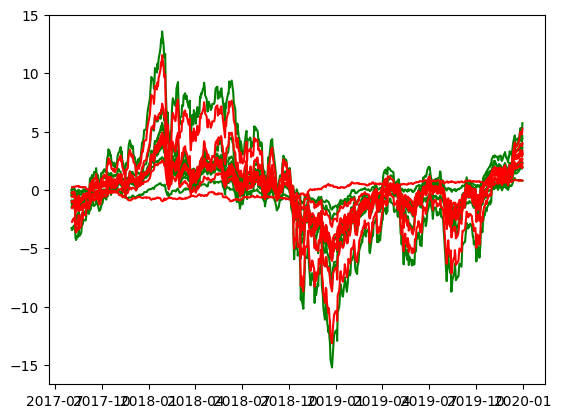

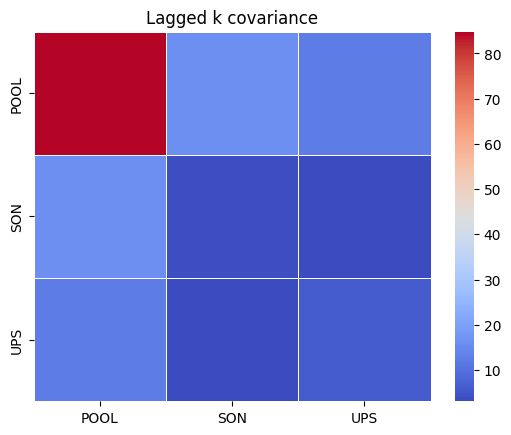

array([-0.2621538 ,  0.84055005, -0.47407911])

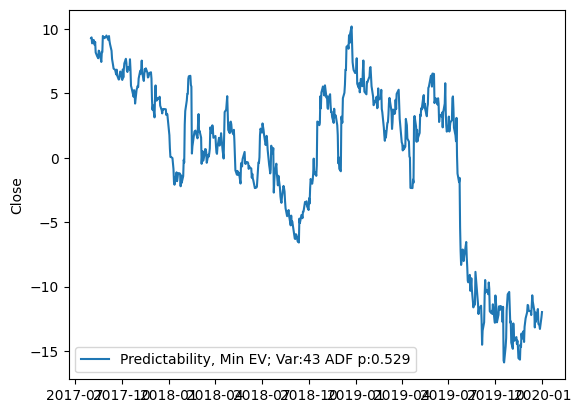

array([[ 0.9619833 ,  0.07879593, -0.0383157 ],
       [ 0.07879593,  0.71086643,  0.08199031],
       [-0.0383157 ,  0.08199031,  0.80660565]])

0         1         2
2017-08-03 -48.363738 -9.465350 -2.643279
2017-08-04 -46.461084 -9.062426 -2.355389
2017-08-07 -47.393976 -9.200917 -2.444953
2017-08-08 -47.180173 -9.237204 -2.436127
2017-08-09 -47.427766 -9.313304 -2.099199
...               ...       ...       ...
2019-12-24  53.351978  9.876097  5.421275
2019-12-26  52.763016  9.901767  5.946437
2019-12-27  53.347922  9.808177  5.834508
2019-12-30  54.929671  9.983762  4.036476
2019-12-31  52.552909  9.842095  4.566736

[607 rows x 3 columns]

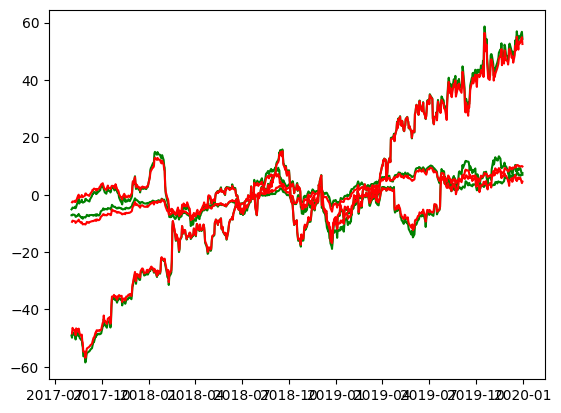

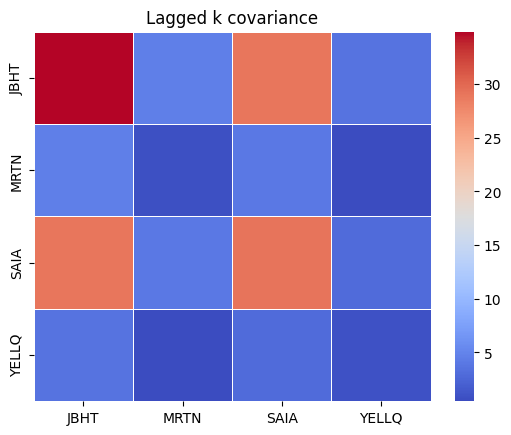

array([-0.75744496,  0.43834913,  0.29828787,  0.38098756])

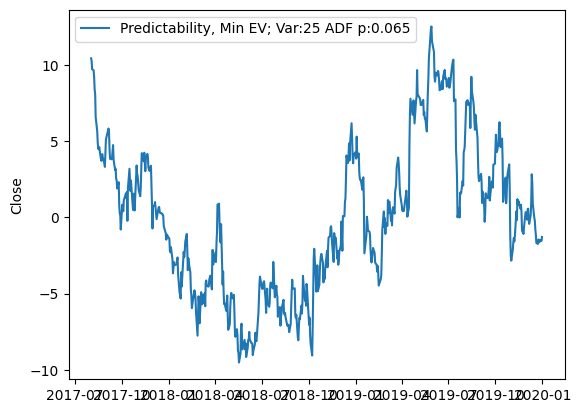

array([[ 0.78773578,  0.07490619,  0.06722079,  0.0365927 ],
       [ 0.07490619,  0.83569906,  0.01621686, -0.02047087],
       [ 0.06722079,  0.01621686,  0.90842106, -0.04858108],
       [ 0.0365927 , -0.02047087, -0.04858108,  0.83384715]])

0         1          2         3
2017-08-03 -17.138778 -3.929834 -18.431042  3.801057
2017-08-04 -16.170349 -3.748601 -18.052014  4.158052
2017-08-07 -16.064670 -3.710513 -17.855979  4.052092
2017-08-08 -15.928791 -3.725035 -18.470851  4.003731
2017-08-09 -14.970053 -3.628993 -18.069996  3.980242
...               ...       ...        ...       ...
2019-12-24   7.485163  2.084614  19.629786 -5.542373
2019-12-26   7.615623  2.144714  19.434408 -5.534179
2019-12-27   7.581576  2.150978  19.672223 -5.500032
2019-12-30   7.485283  1.992401  19.529420 -5.534046
2019-12-31   7.712031  2.100252  20.359303 -5.381564

[607 rows x 4 columns]

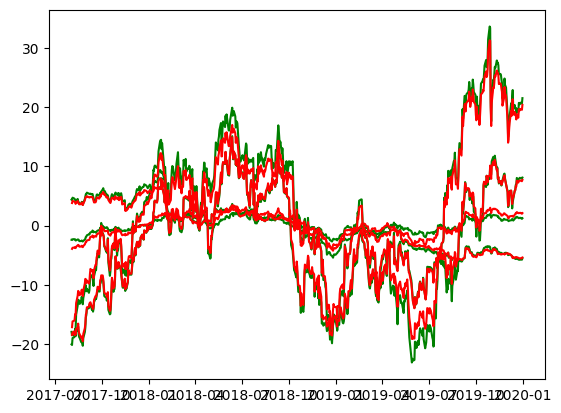

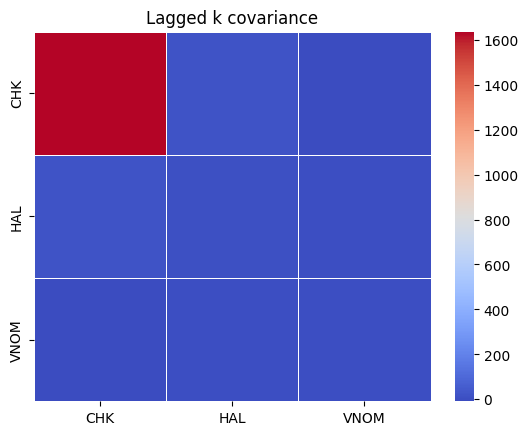

array([-0.88565814,  0.19397148, -0.42188235])

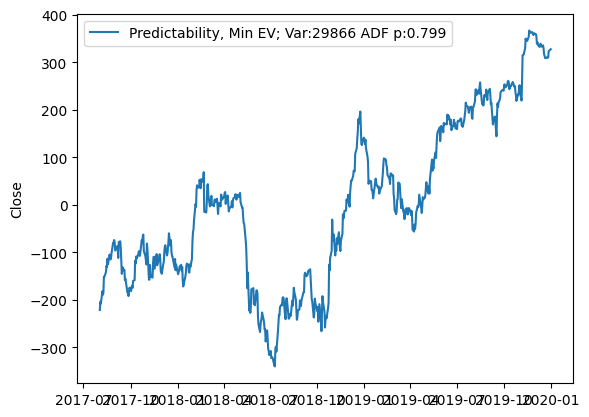

array([[ 0.73850716,  0.03469933, -0.08980108],
       [ 0.03469933,  0.91349994,  0.030775  ],
       [-0.08980108,  0.030775  ,  0.89080001]])

0          1          2
2017-08-03  175.211769  12.597468 -29.148001
2017-08-04  178.866890  12.732382 -29.602656
2017-08-07  156.886334  11.265060 -26.867470
2017-08-08  162.988831  11.208450 -27.772049
2017-08-09  159.310669  11.257257 -27.017584
...                ...        ...        ...
2019-12-24 -260.507818 -20.201825  30.732555
2019-12-26 -259.693593 -20.433280  30.719835
2019-12-27 -270.696177 -21.079636  31.780416
2019-12-30 -273.216667 -21.061282  32.092152
2019-12-31 -274.143728 -21.198108  31.920170

[607 rows x 3 columns]

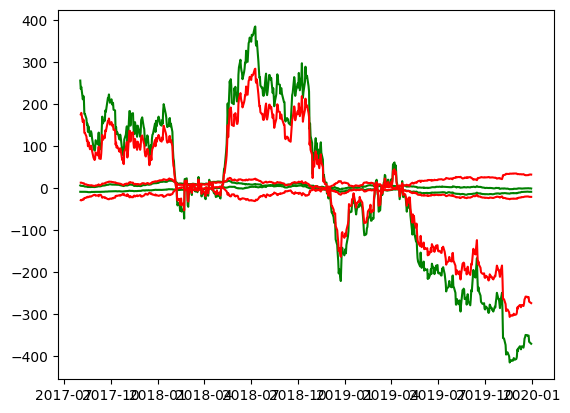

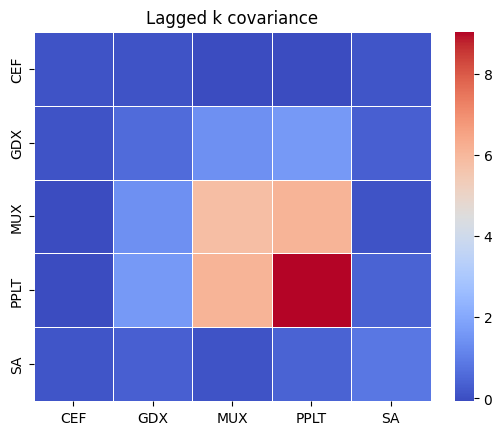

array([ 0.13716142, -0.43465436,  0.78164881, -0.35316747,  0.23782388])

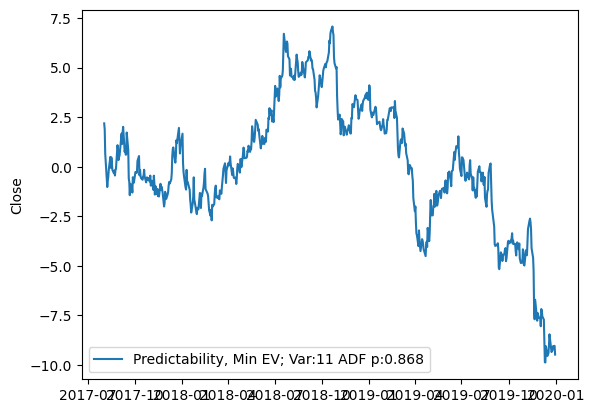

array([[ 0.79370174, -0.00533599, -0.05738672, -0.03289248,  0.00282461],
       [-0.00533599,  0.82368259,  0.11368401, -0.0385307 ,  0.03006477],
       [-0.05738672,  0.11368401,  0.72556114,  0.1212091 , -0.07999963],
       [-0.03289248, -0.0385307 ,  0.1212091 ,  0.88780048,  0.01740294],
       [ 0.00282461,  0.03006477, -0.07999963,  0.01740294,  0.91526263]])

0         1         2         3         4
2017-08-03 -1.131984 -0.044263  5.537570  8.060533 -1.115867
2017-08-04 -1.134312 -0.535430  4.402023  8.068599 -1.225763
2017-08-07 -1.086877 -0.812669  3.360545  8.047264 -1.427193
2017-08-08 -0.979845 -0.827693  3.102329  8.296499 -1.295907
2017-08-09 -0.868888 -0.510897  3.579337  8.447819 -1.377899
...              ...       ...       ...       ...       ...
2019-12-24  1.406749  3.682548 -4.112897  3.445999  2.030301
2019-12-26  1.456318  4.053505 -3.663773  3.897372  2.102198
2019-12-27  1.442704  3.898896 -3.823710  3.369930  2.048013
2019-12-30  1.378533  4.438354 -3.056046  4.522811  2.306625
2019-12-31  1.394144  4.206724 -3.196405  5.202364  2.283703

[607 rows x 5 columns]

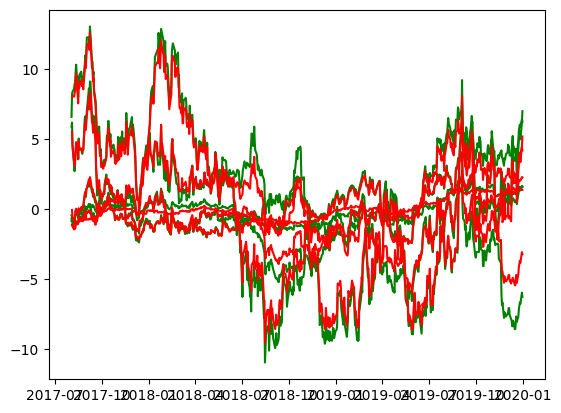

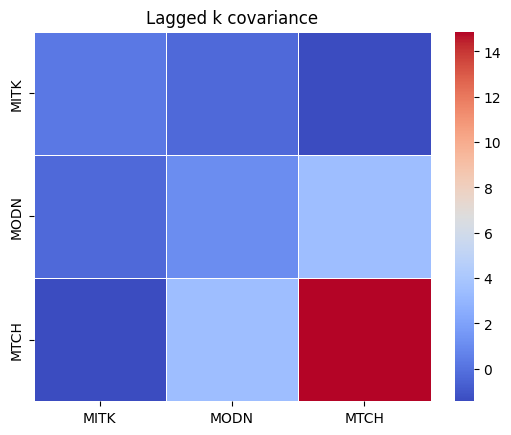

array([-0.96818246, -0.09269803, -0.23244312])

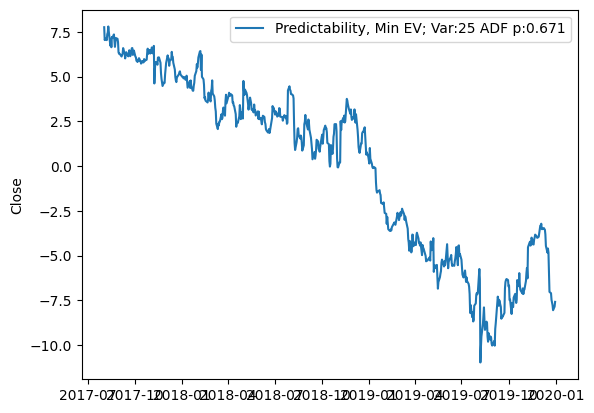

array([[ 0.42958742, -0.05081182, -0.13104584],
       [-0.05081182,  0.85393275,  0.02792824],
       [-0.13104584,  0.02792824,  0.92796095]])

0          1          2
2017-08-03  4.699015  -5.614897 -29.234208
2017-08-04  4.694331  -5.742402 -29.296802
2017-08-07  4.746302  -5.833714 -29.340538
2017-08-08  4.593005  -5.983924 -29.207462
2017-08-09  4.546757  -5.640900 -29.303821
...              ...        ...        ...
2019-12-24 -5.653650  15.224704  30.125223
2019-12-26 -5.922906  15.547400  31.605473
2019-12-27 -6.133413  15.421605  33.016941
2019-12-30 -5.961401  15.244063  32.029971
2019-12-31 -5.852380  15.016854  31.221184

[607 rows x 3 columns]

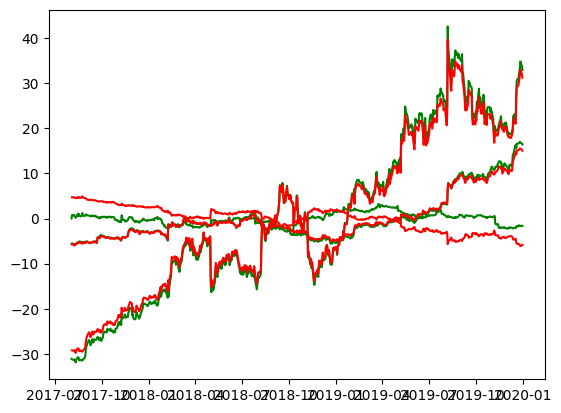

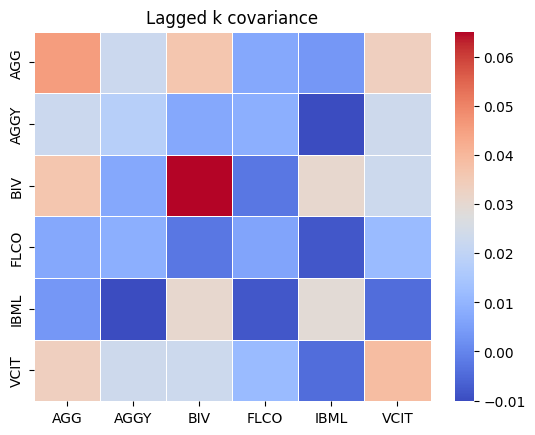

array([ 0.28401287, -0.86884641, -0.01893611,  0.02077862, -0.29543241,
        0.27635478])

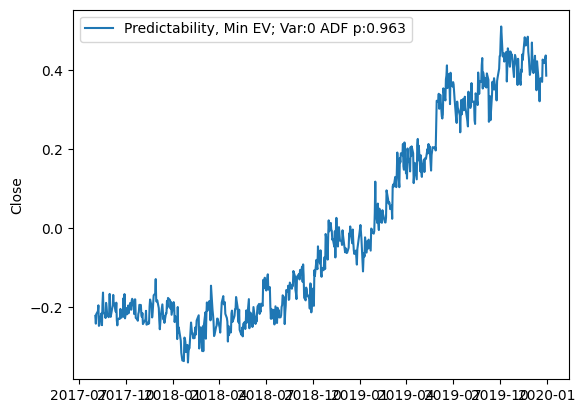

array([[ 6.20330219e-01,  1.07051981e-01,  2.05142367e-02,
         6.14680083e-04, -1.51093130e-02, -1.44263058e-01],
       [ 1.07051981e-01,  3.12265107e-01, -5.05947789e-02,
         8.43966782e-02, -2.19912279e-01,  1.02222834e-01],
       [ 2.05142367e-02, -5.05947789e-02,  7.68805882e-01,
        -2.79750139e-02,  8.09944950e-02, -5.02151700e-02],
       [ 6.14680083e-04,  8.43966782e-02, -2.79750139e-02,
         3.25112058e-01, -5.70943846e-02,  1.89856108e-01],
       [-1.51093130e-02, -2.19912279e-01,  8.09944950e-02,
        -5.70943846e-02,  8.10463215e-01,  2.20101098e-02],
       [-1.44263058e-01,  1.02222834e-01, -5.02151700e-02,
         1.89856108e-01,  2.20101098e-02,  6.42318175e-01]])

0         1         2         3         4         5
2017-08-03 -0.964191 -0.576073 -0.625206 -0.479551  0.071289 -0.896328
2017-08-04 -1.049432 -0.623920 -0.771685 -0.511425  0.045607 -0.979541
2017-08-07 -1.055922 -0.625737 -0.734135 -0.504473  0.066966 -0.949496
2017-08-08 -1.102593 -0.668579 -0.832449 -0.561490  0.052323 -1.045332
2017-08-09 -1.045966 -0.661565 -0.766389 -0.565863  0.101702 -1.055115
...              ...       ...       ...       ...       ...       ...
2019-12-24  3.614460  2.291896  4.013265  2.160864  0.381901  4.268716
2019-12-26  3.675521  2.317515  4.102214  2.166721  0.363496  4.267223
2019-12-27  3.750730  2.375944  4.168201  2.233351  0.363709  4.373402
2019-12-30  3.739455  2.381755  4.180090  2.250660  0.374624  4.425902
2019-12-31  3.603794  2.326049  4.101504  2.198432  0.367021  4.349837

[607 rows x 6 columns]

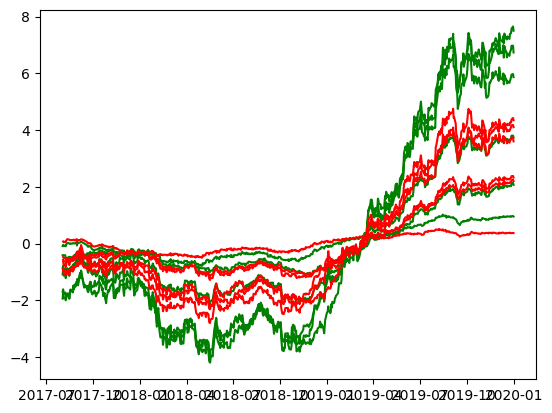

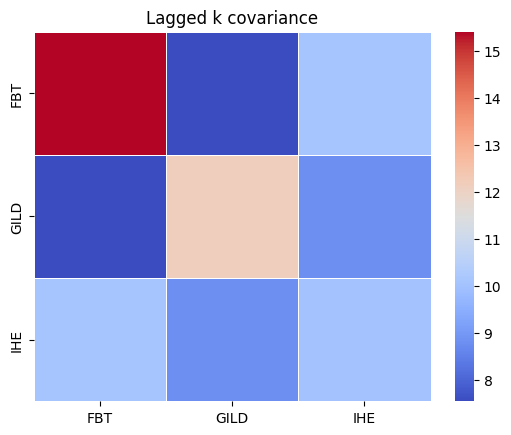

array([ 0.44365233,  0.36637191, -0.81789011])

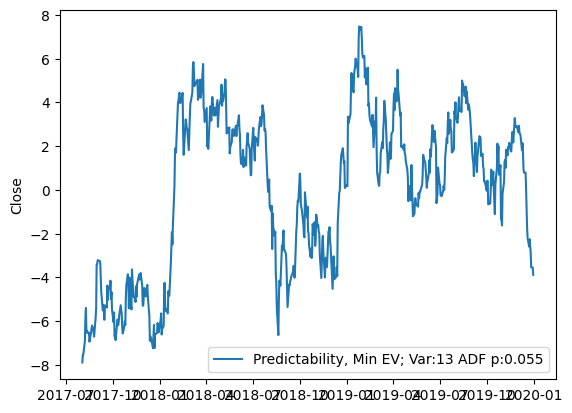

array([[ 0.84078017, -0.0049732 ,  0.07561512],
       [-0.0049732 ,  0.89838135,  0.08738797],
       [ 0.07561512,  0.08738797,  0.7774354 ]])

0         1          2
2017-08-03 -17.380138  0.521163  -2.762877
2017-08-04 -16.694431 -0.327344  -2.783773
2017-08-07 -16.099903 -0.154303  -2.895933
2017-08-08 -17.857619 -0.467105  -4.876423
2017-08-09 -17.615243 -0.055775  -4.974298
...               ...       ...        ...
2019-12-24  15.843021  0.174315  10.597033
2019-12-26  13.793401 -0.114088   9.880367
2019-12-27  12.266048 -0.465551   9.463903
2019-12-30  10.954316 -1.333142   8.368752
2019-12-31  11.286864 -1.244717   8.879966

[607 rows x 3 columns]

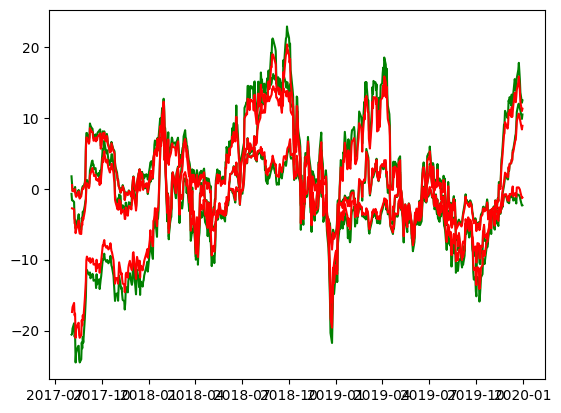

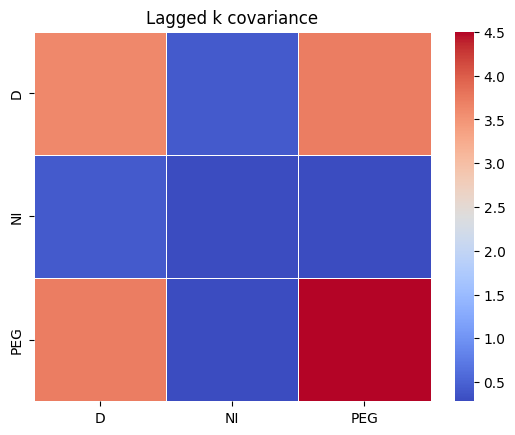

array([-0.80853507,  0.09222414,  0.58117618])

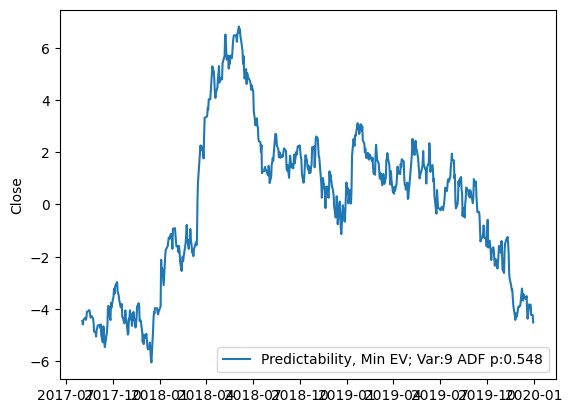

array([[ 0.84082065,  0.00870022,  0.09366898],
       [ 0.00870022,  0.88476743, -0.00571159],
       [ 0.09366898, -0.00571159,  0.90371795]])

0         1         2
2017-08-03 -1.341748 -0.650433 -7.867573
2017-08-04 -1.548925 -0.723017 -7.934782
2017-08-07 -1.651021 -0.750547 -7.954889
2017-08-08 -1.620524 -0.786019 -7.897627
2017-08-09 -1.720117 -0.741079 -8.141309
...              ...       ...       ...
2019-12-24  7.982979  1.377431  5.795875
2019-12-26  8.059003  1.315622  5.894140
2019-12-27  8.433190  1.275527  5.900428
2019-12-30  8.501194  1.443785  5.978197
2019-12-31  9.054913  1.695086  6.323863

[607 rows x 3 columns]

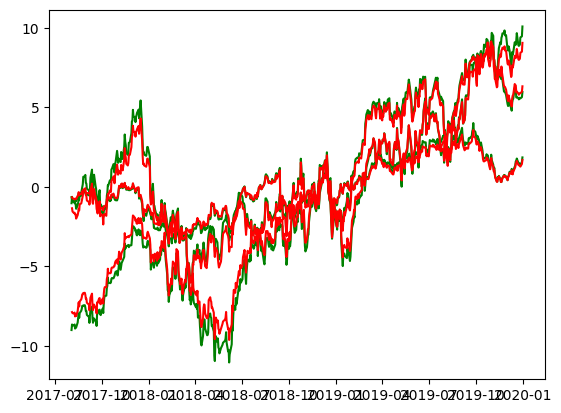

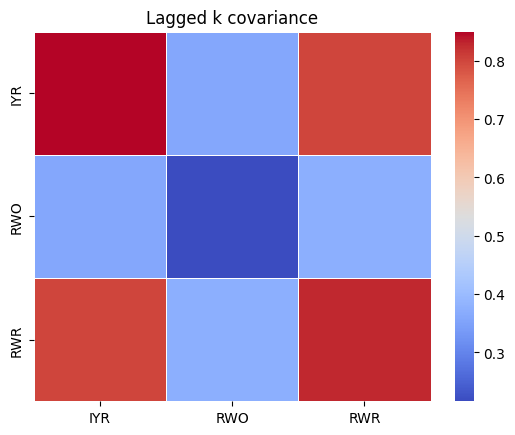

array([ 0.31031424,  0.15775126, -0.93745379])

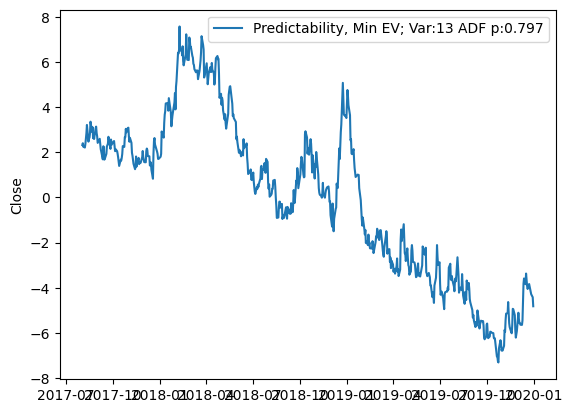

array([[ 0.87205767, -0.0341986 ,  0.09563209],
       [-0.0341986 ,  0.85251312,  0.03693177],
       [ 0.09563209,  0.03693177,  0.60364035]])

0         1         2
2017-08-03  -5.001643 -1.568688 -3.367699
2017-08-04  -4.824457 -1.497779 -3.202657
2017-08-07  -4.810816 -1.548164 -3.185808
2017-08-08  -5.122427 -1.693254 -3.410773
2017-08-09  -5.244307 -1.768773 -3.605339
...               ...       ...       ...
2019-12-24  10.152039  3.427163  6.323844
2019-12-26  10.571324  3.590343  6.638541
2019-12-27  10.775464  3.760708  6.787694
2019-12-30  10.842677  3.799035  6.897528
2019-12-31  11.394729  3.982576  7.352161

[607 rows x 3 columns]

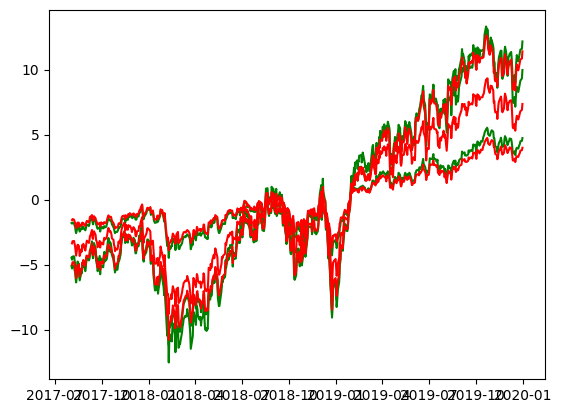

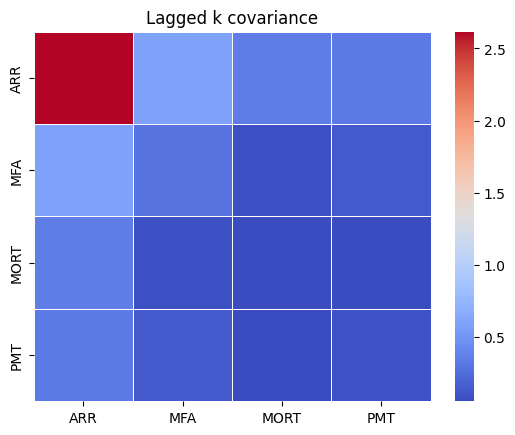

array([ 0.04108987, -0.40499881, -0.61871977,  0.67191773])

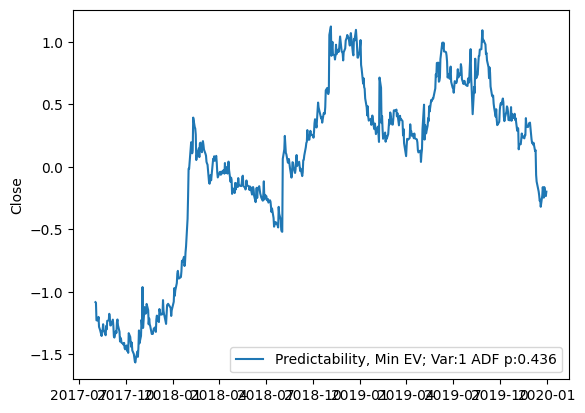

array([[ 0.86687198,  0.02691944,  0.06573097,  0.05556541],
       [ 0.02691944,  0.87647175, -0.08620821,  0.1335864 ],
       [ 0.06573097, -0.08620821,  0.60916764,  0.02574717],
       [ 0.05556541,  0.1335864 ,  0.02574717,  0.62124163]])

0         1         2         3
2017-08-03  2.628746  0.075968 -0.254802 -1.192310
2017-08-04  2.679149  0.047226 -0.293046 -1.357145
2017-08-07  2.886496  0.100946 -0.250235 -1.299124
2017-08-08  3.149758  0.096629 -0.165828 -1.217876
2017-08-09  3.157528  0.235420 -0.154869 -1.186154
...              ...       ...       ...       ...
2019-12-24 -1.831538  2.352921  0.901061  2.233612
2019-12-26 -1.600284  2.613151  0.969403  2.374415
2019-12-27 -1.460753  2.471689  1.020230  2.392688
2019-12-30 -1.907150  2.308917  0.901649  2.157080
2019-12-31 -1.604385  2.303007  0.920544  2.179811

[607 rows x 4 columns]

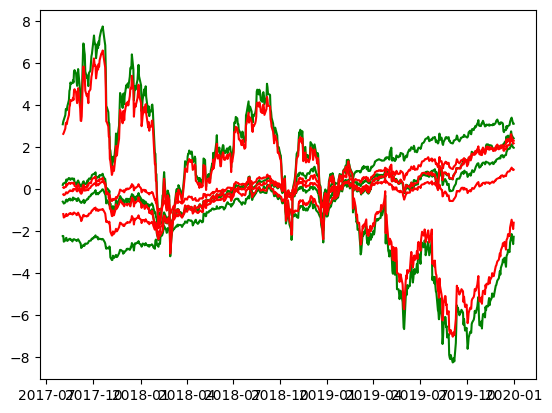

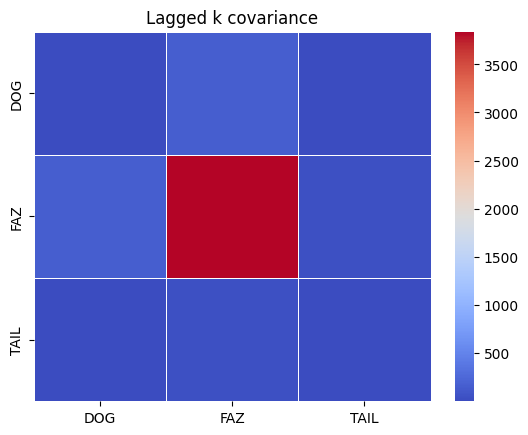

array([-0.1643951 ,  0.05661209, -0.98476866])

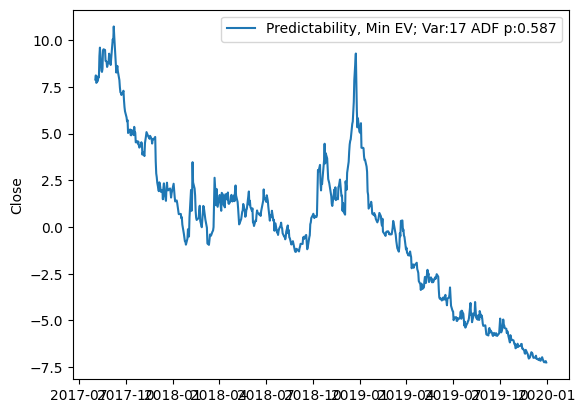

array([[ 0.79100279,  0.03106565, -0.05603389],
       [ 0.03106565,  0.96534514,  0.02474768],
       [-0.05603389,  0.02474768,  0.45542436]])

0           1         2
2017-08-03  13.464621  200.746431  5.628878
2017-08-04  13.079933  192.351189  5.390346
2017-08-07  13.051076  194.172522  5.447837
2017-08-08  13.223444  198.546778  5.557703
2017-08-09  13.282904  199.642078  5.642632
...               ...         ...       ...
2019-12-24 -10.739136 -165.350260 -4.525870
2019-12-26 -10.960819 -168.328741 -4.597682
2019-12-27 -11.002571 -168.029615 -4.554769
2019-12-30 -10.707549 -166.244308 -4.530597
2019-12-31 -10.818959 -168.023213 -4.581319

[607 rows x 3 columns]

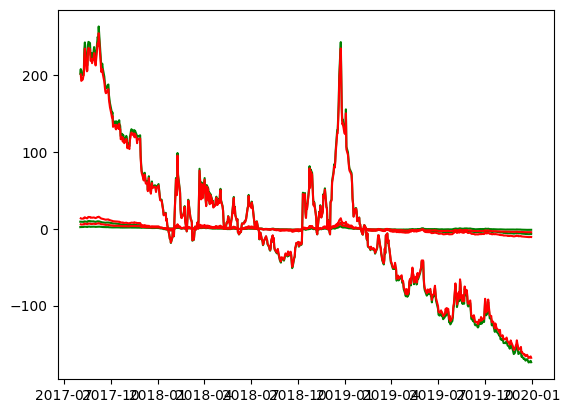

In [187]:
# cov formula is E[(x-E(x))(y-E(y))]
def autocovariance_matrix(x, k=0):
    # x is T x N (N is no of stocks)
    T = x.shape[0]
    x_tilde = x - np.mean(x, axis=0) # centre x
    if k == 0: return 1/(T - 1) * (x_tilde.T @ x_tilde)
    x1 = x_tilde[k:].reset_index(drop=True).T
    x2 = x_tilde[:-k].reset_index(drop=True)
    return 1/(T - k - 1) * (x1 @ x2)

# Plot time series with basic stats
def plot_pred_ts(ts, label):
    var_ = np.var(ts)
    adf_ = adfuller(ts)
    plt.plot(ts, label='{}; Var:{:.0f} ADF p:{:.3f}'.format(label, var_, adf_[1]))
    plt.ylabel('Close')
    plt.legend()
    plt.show()

for cluster in clusters:
    X, X_f = train_df.loc[:, cluster], train_valid_df.loc[:, cluster]
    X = X - np.mean(X, axis=0)
    X_f = X_f - np.mean(X_f, axis=0)

    A0 = autocovariance_matrix(X, 0)

    sns.heatmap(A0, cmap='coolwarm', linewidths=0.5)
    plt.title("Lagged k covariance")
    plt.show()

    A0 = np.array(A0)
    A1 = np.array(autocovariance_matrix(X, 1)) # convert to np array so there is no index and column

    # Minimise predictability
    A0_inv = np.linalg.inv(A0)
    A0_inv_sqrt = sqrtm(A0_inv)

    pred_mat = A0_inv_sqrt @ A1 @ A0_inv @ A1.T @ A0_inv_sqrt

    v, w = np.linalg.eig(pred_mat)
    min_eig = w[:, np.argmin(v)]
    max_eig = w[:, np.argmax(v)]

    # print("Min eigenvector: ", min_eig)
    # print("Max eigenvector: ", max_eig)

    pred_portf_min = X @ min_eig
    pred_portf_max = X @ max_eig

    display(min_eig)
    plot_pred_ts(X_f @ min_eig, 'Predictability, Min EV')

    c = X_f.iloc[1:] @ pred_mat
    plt.plot(X_f, 'g')
    plt.plot(c, 'r')
    plt.show()
    # plot_pred_ts(pred_portf_max, 'Predictability, Max EV')
